# Predicting Household Electricity cost using machine Learning 

## Exploratory Data Analysis

### 1. Narrative of the business problem

##### Budgeting and estimating the household expenses can be a big challenge for many. With soaring inflation, there are only a few areas where we can cut costs, and utility expenses can be one of those if we understand our usage pattern and try to cut corners. But where to begin? In some states like Texas, there are hundreds of utility providers that offer variety of plans which only makes it more confusing and frustrating for the consumers. To make matters even more complicated, some companies provide lucrative discounts for 12-month or 24-month contracts, which can be a huge problem if the customers don't understand the billing pattern as they usually surprise the consumers with the hidden costs. Though the usage can vary depending on the month of the year, estimating the usage will give an idea of what to expect in the utility bill at the time of signing up. For instance, the residents in Texas may see a huge spike in their summer electricity bills most likely due to the extensive usage of Air conditioners to beat the summer heat, while the residents in Alaska may pay more for the heating up their home. There are many more factors that can contribute to the electricity usage than just the AC or the heating units which will be explored in this project.

### 2. How can Machine Learning provide a solution to the problem?

##### To help the customers, building a tool that gives an estimate of the average electric bill by answering a few survey questions about the household will be of great help. Machine learning can help to build a model  to predict the electric bill for the household. The dataset is collected from selected households from each state by answering a survey with various questions describing the factors that can contribute to the bill. The accuracy of the model can improve over the time as more datasamples are collected that can help train the model better.

### 3. Features and Target for the Machine Learning Model

##### In this project, a set of descriptive characteristics of the household along with the state and region data will be used as the features for building the machine learning model. The target will be the estimate of the monthly utility bill for the household.

### 4. Dataset

##### The dataset for the project is taken from https://www.eia.gov/consumption/residential/data/2020/index.php?view=microdata

In [1]:
# Setting a Dark Theme
!jt -t monokai

In [2]:
# Importing the Required libraries 
import pandas as pd
import numpy as np
import os
import sys
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import HuberRegressor
import catboost as cb

In [3]:
# Setting global options for the notebook such as maxrows
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_rows", 100)
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Setting Values for Sampling data from the Dataset
random_nbr=32
sample_size=5000

In [5]:
# Importing the Dataset 
path=os.getcwd()
# Assigning a path for the file 
RECS_file_path=path+"\\recs2020_public_v5.csv"

In [6]:
# Loading the source file into Pandas DataFrame
RECS_df_orig=pd.read_csv(RECS_file_path)
# Printing the shape of the dataframe
RECS_df_orig.shape

(18496, 789)

In [7]:
RECS_df=RECS_df_orig.copy()
# Printing top 5 rows of the Dataframe
RECS_df.head()

DOEID    REGIONC            DIVISION  STATE_FIPS state_postal  \
0  100001       WEST      Mountain South          35           NM   
1  100002      SOUTH  West South Central           5           AR   
2  100003       WEST      Mountain South          35           NM   
3  100004      SOUTH      South Atlantic          45           SC   
4  100005  NORTHEAST     Middle Atlantic          34           NJ   

       state_name   BA_climate IECC_climate_code UATYP10  HDD65  CDD65  \
0      New Mexico    Mixed-Dry                4B       U   3844   1679   
1        Arkansas  Mixed-Humid                4A       U   3766   1458   
2      New Mexico    Mixed-Dry                4B       U   3819   1696   
3  South Carolina  Mixed-Humid                3A       U   2614   1718   
4      New Jersey  Mixed-Humid                4A       U   4219   1363   

   HDD30YR_PUB  CDD30YR_PUB  TYPEHUQ  CELLAR  CRAWL  CONCRETE  BASEOTH  \
0         4451         1027        2       0      0         1        0   
1         4429         1305        5      -2     -2        -2       -2   
2         4500         1010        5      -2     -2        -2       -2   
3         3229         1653        2       0      1         0        0   
4         4896         1059        5      -2     -2        -2       -2   

   BASEFIN  ATTIC  ATTICFIN  STORIES  PRKGPLC1  SIZEOFGARAGE  KOWNRENT  ...  \
0       -2      0        -2        1         1             2         1  ...   
1       -2     -2        -2       -2        -2            -2         2  ...   
2       -2     -2        -2       -2        -2            -2         2  ...   
3       -2      0        -2        2         1             2         1  ...   
4       -2     -2        -2       -2        -2            -2         2  ...   

   BTUFOSPH  BTUFOWTH  BTUFONEC  BTUFOOTH  GALLONFOSPH  GALLONFOWTH  \
0       0.0       0.0       0.0       0.0          0.0          0.0   
1       0.0       0.0       0.0       0.0          0.0          0.0   
2       0.0       0.0       0.0       0.0          0.0          0.0   
3       0.0       0.0       0.0       0.0          0.0          0.0   
4       0.0       0.0       0.0       0.0          0.0          0.0   

   GALLONFONEC  GALLONFOOTH  DOLFOSPH  DOLFOWTH  DOLFONEC  DOLFOOTH  BTUWD  \
0          0.0          0.0       0.0       0.0       0.0       0.0    0.0   
1          0.0          0.0       0.0       0.0       0.0       0.0    0.0   
2          0.0          0.0       0.0       0.0       0.0       0.0    0.0   
3          0.0          0.0       0.0       0.0       0.0       0.0    0.0   
4          0.0          0.0       0.0       0.0       0.0       0.0    0.0   

   ZWDAMOUNT  TOTALBTUSPH  TOTALDOLSPH  TOTALBTUWTH  TOTALDOLWTH  TOTALBTUOTH  \
0         -2     73942.18       509.15     21241.34       146.26     35017.07   
1         -2      6293.72       250.94     10145.32       261.73      5674.46   
2         -2     16993.72       141.45      5609.36        46.69      2743.10   
3         -2     42812.12       836.64     21061.21       243.37     14574.78   
4         -2      8818.47        84.81     27944.03       268.75     12606.65   

   TOTALDOLOTH   TOTALBTU  TOTALDOL  DBT1  DBT99   GWT  
0      1340.37  144647.71   2656.89  92.9   21.6  58.5  
1       226.25   28034.61    975.00  91.3   16.1  57.2  
2       112.64   30749.71    522.65  92.9   21.6  58.5  
3       607.29   86765.19   2061.77  91.8   25.1  61.5  
4       579.87   59126.93   1463.04  81.8   13.0  55.9  

[5 rows x 789 columns]

In [8]:
# Printing the shape of the dataframe
RECS_df.shape

(18496, 789)

#### Description of some of the columns are given below:

#####  BA_climate:  Building America Climate Zone
##### HDD65: Heating degree days in 2020, base temperature 65F; Derived from the weighted temperatures of nearby weather stations
##### CDD65: Cooling degree days in 2020, base temperature 65F; Derived from the weighted temperatures of nearby weather stations
##### TYPEHUQ: Type of Hosusing Unit
##### CELLAR: Housing unit over a basement
##### STORIES: Number of stories in a single-family home
##### TOTROOMS: Total number of rooms in the housing unit, excluding bathrooms; a derived variable
##### ORIGWIN: Mostly original windows in home
##### FUELPOOL: Fuel used for heating swimming pool
##### NUMFRIG: Number of refrigerators used
##### SIZRFRI1: Size of most-used refrigerator
#####  AGEFRZR: Age of most-used freezer
##### AGEDW: Age of dishwasher
##### EQUIPAGE: Age of main space heating equipment
##### ELPAY: Whow pays for electricity?
##### TOTSQFT_EN: Total energy-consuming area (square footage) of the housing unit. Includes all main living areas; all basements; heated, cooled, or finished attics; and heating or cooled garages. For single-family housing units this is derived using the respondent-reported square footage (SQFTEST) and adjusted using the "include" variables (e.g., SQFTINCB), where applicable. For apartments and mobile homes this is the respondent-reported square footage. A derived variable rounded to the nearest 10
##### DOLLAREL: Total electricity cost, in dollars, 2020

### 5. Exploratory Data Analysis

In [9]:
# This gives the number of rows and columns in the dataset, the type of the columns and the memory used
RECS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18496 entries, 0 to 18495
Columns: 789 entries, DOEID to GWT
dtypes: float64(235), int64(547), object(7)
memory usage: 111.3+ MB


In [10]:
# This prints the statistical description of the columns
RECS_df.describe()

DOEID    STATE_FIPS         HDD65         CDD65   HDD30YR_PUB  \
count   18496.000000  18496.000000  18496.000000  18496.000000  18496.000000   
mean   109248.500000     28.473994   4271.806607   1525.515517   4679.407169   
std      5339.479625     15.992746   2329.457038   1143.238380   2338.516332   
min    100001.000000      1.000000      0.000000      0.000000      0.000000   
25%    104624.750000     15.000000   2433.750000    814.000000   2897.750000   
50%    109248.500000     28.000000   4396.500000   1179.000000   4825.000000   
75%    113872.250000     42.000000   5810.250000   1805.000000   6290.000000   
max    118496.000000     56.000000  17383.000000   5534.000000  16071.000000   

        CDD30YR_PUB       TYPEHUQ        CELLAR         CRAWL      CONCRETE  \
count  18496.000000  18496.000000  18496.000000  18496.000000  18496.000000   
mean    1309.878785      2.547145     -0.115647     -0.252487     -0.175984   
std      988.472131      1.119777      1.143162      1.058109      1.108549   
min        0.000000      1.000000     -2.000000     -2.000000     -2.000000   
25%      601.000000      2.000000      0.000000      0.000000      0.000000   
50%     1020.000000      2.000000      0.000000      0.000000      0.000000   
75%     1703.000000      3.000000      1.000000      0.000000      1.000000   
max     4905.000000      5.000000      1.000000      1.000000      1.000000   

            BASEOTH       BASEFIN         ATTIC      ATTICFIN       STORIES  \
count  18496.000000  18496.000000  18496.000000  18496.000000  18496.000000   
mean      -0.422470     -1.050011      0.015138     -0.949016      0.743837   
std        0.913709      1.292245      1.204474      1.089976      1.701967   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%        0.000000     -2.000000      0.000000     -2.000000      1.000000   
50%        0.000000     -2.000000      0.000000     -2.000000      1.000000   
75%        0.000000      0.000000      1.000000      0.000000      2.000000   
max        1.000000      1.000000      1.000000      1.000000      5.000000   

           PRKGPLC1  SIZEOFGARAGE      KOWNRENT  YEARMADERANGE      BEDROOMS  \
count  18496.000000  18496.000000  18496.000000   18496.000000  18496.000000   
mean      -0.001730     -0.129109      1.282656       4.543469      2.887111   
std        1.197545      2.000563      0.471650       2.325302      1.083542   
min       -2.000000     -2.000000      1.000000       1.000000      0.000000   
25%        0.000000     -2.000000      1.000000       3.000000      2.000000   
50%        0.000000     -2.000000      1.000000       5.000000      3.000000   
75%        1.000000      2.000000      2.000000       6.000000      4.000000   
max        1.000000      3.000000      3.000000       9.000000      6.000000   

           NCOMBATH      NHAFBATH      OTHROOMS      TOTROOMS        STUDIO  \
count  18496.000000  18496.000000  18496.000000  18496.000000  18496.000000   
mean       1.813473      0.357375      3.644626      6.531737     -1.618512   
std        0.757783      0.532062      1.639752      2.361461      0.801331   
min        0.000000      0.000000      1.000000      1.000000     -2.000000   
25%        1.000000      0.000000      2.000000      5.000000     -2.000000   
50%        2.000000      0.000000      3.000000      6.000000     -2.000000   
75%        2.000000      1.000000      5.000000      8.000000     -2.000000   
max        4.000000      2.000000      9.000000     15.000000      1.000000   

       ...       BTUFOSPH      BTUFOWTH       BTUFONEC       BTUFOOTH  \
count  ...   18496.000000  18496.000000   18496.000000   18496.000000   
mean   ...    4140.149725    689.995363     278.456861     278.456861   
std    ...   19265.814882   4018.291134    3796.973451    3796.973451   
min    ...       0.000000      0.000000       0.000000       0.000000   
25%    ...       0.000000      0.000000       0.000000       0.000000   

##### ***Observation:*** The columns such as CELLAR, CRAWL etc have negative values to represent missing values. They have to be treated later and these columns should be converted to labels.

In [11]:
# This prints the statistical description of the columns in a readable format
RECS_df.describe().T

count           mean           std        min        25%  \
DOEID        18496.0  109248.500000   5339.479625  100001.00  104624.75   
STATE_FIPS   18496.0      28.473994     15.992746       1.00      15.00   
HDD65        18496.0    4271.806607   2329.457038       0.00    2433.75   
CDD65        18496.0    1525.515517   1143.238380       0.00     814.00   
HDD30YR_PUB  18496.0    4679.407169   2338.516332       0.00    2897.75   
...              ...            ...           ...        ...        ...   
TOTALBTU     18496.0   83002.293408  53205.995000    1182.22   45565.16   
TOTALDOL     18496.0    1990.168945   1108.993307    -150.51    1258.32   
DBT1         18496.0      89.990003      6.065702      57.70      87.50   
DBT99        18496.0      17.342074     15.568703     -44.90       7.10   
GWT          18496.0      56.097280      9.606300      32.10      49.50   

                    50%          75%         max  
DOEID        109248.500  113872.2500   118496.00  
STATE_FIPS       28.000      42.0000       56.00  
HDD65          4396.500    5810.2500    17383.00  
CDD65          1179.000    1805.0000     5534.00  
HDD30YR_PUB    4825.000    6290.0000    16071.00  
...                 ...          ...         ...  
TOTALBTU      74180.110  108535.0200  1367548.13  
TOTALDOL       1793.205    2471.9975    20043.41  
DBT1             90.200      92.6000      111.40  
DBT99            16.100      27.5000       67.50  
GWT              54.900      62.4000       80.80  

[782 rows x 8 columns]

In [12]:
# Printing the type of each column in the dataset
RECS_df.dtypes[:50]

DOEID                 int64
REGIONC              object
DIVISION             object
STATE_FIPS            int64
state_postal         object
state_name           object
BA_climate           object
IECC_climate_code    object
UATYP10              object
HDD65                 int64
CDD65                 int64
HDD30YR_PUB           int64
CDD30YR_PUB           int64
TYPEHUQ               int64
CELLAR                int64
CRAWL                 int64
CONCRETE              int64
BASEOTH               int64
BASEFIN               int64
ATTIC                 int64
ATTICFIN              int64
STORIES               int64
PRKGPLC1              int64
SIZEOFGARAGE          int64
KOWNRENT              int64
YEARMADERANGE         int64
BEDROOMS              int64
NCOMBATH              int64
NHAFBATH              int64
OTHROOMS              int64
TOTROOMS              int64
STUDIO                int64
WALLTYPE              int64
ROOFTYPE              int64
HIGHCEIL              int64
DOOR1SUM            

##### ***Observation:*** It appears many columns such as ATHOME,MONEYPY , etc that contains labels are misread as integers. These have to be treated later by using one-hot encoding.

In [13]:
# Checking for Nulls and printing results of first 50 columns
RECS_df.isnull().sum()[:50]

DOEID                0
REGIONC              0
DIVISION             0
STATE_FIPS           0
state_postal         0
state_name           0
BA_climate           0
IECC_climate_code    0
UATYP10              0
HDD65                0
CDD65                0
HDD30YR_PUB          0
CDD30YR_PUB          0
TYPEHUQ              0
CELLAR               0
CRAWL                0
CONCRETE             0
BASEOTH              0
BASEFIN              0
ATTIC                0
ATTICFIN             0
STORIES              0
PRKGPLC1             0
SIZEOFGARAGE         0
KOWNRENT             0
YEARMADERANGE        0
BEDROOMS             0
NCOMBATH             0
NHAFBATH             0
OTHROOMS             0
TOTROOMS             0
STUDIO               0
WALLTYPE             0
ROOFTYPE             0
HIGHCEIL             0
DOOR1SUM             0
WINDOWS              0
TYPEGLASS            0
ORIGWIN              0
WINFRAME             0
TREESHAD             0
ADQINSUL             0
DRAFTY               0
UGASHERE   

##### ***Observation:*** None of the columns have nulls, however many of these columns should be treated for negative values to present missing data that are misread as Integers.

In [14]:
# Creating a new Dataframe by grouping by State and taking sum of KWHAHUCOL
Cooling_Usage_byState_df=RECS_df.groupby("state_postal").sum()['KWHAHUCOL'].sort_values(ascending=False)
Cooling_Usage_byState_df=Cooling_Usage_byState_df.reset_index()
# For representation purpose, dividing the result by 1000
Cooling_Usage_byState_df["KWHAHUCOL"]=Cooling_Usage_byState_df["KWHAHUCOL"]/1000

In [15]:
# Creating Dataframe with top 10 and least 10 states with their AC usage
Cooling_Usage_byState_df=pd.concat([Cooling_Usage_byState_df.iloc[:10,],Cooling_Usage_byState_df.iloc[40:,]])
Cooling_Usage_byState_df

state_postal  KWHAHUCOL
0            TX  652.38503
1            FL  453.62179
2            AZ  385.11738
3            CA  215.20894
4            TN  214.91119
5            LA  207.27493
6            GA  204.48636
7            NC  197.00864
8            VA  166.78432
9            SC  160.70482
40           NM   35.78279
41           OR   34.62402
42           WA   28.50819
43           HI   23.03565
44           RI   20.08376
45           WY   18.76088
46           MT   13.50704
47           NH    9.08786
48           ME    3.22053
49           VT    2.63528
50           AK    0.18016

#### ***Plot1:***Bar Chart of AC Usage by US states(Includes top 10 and least 10 states)

In [16]:
# Bar Chart of AC Usage by US states
sns.set_style('darkgrid')
sns.set_context('paper')
# setting the dimensions of the plot
sns.set(font_scale=8)
fig, ax = plt.subplots(figsize=(150, 60))
# Creating the barplot and setting the Y labels
sns.barplot(x='state_postal',y='KWHAHUCOL',data=Cooling_Usage_byState_df, estimator=np.median)
plt.xlabel('');
plt.ylabel('AC Usage (KW hours)', fontsize=100);
plt.title('AC Usage by State', fontsize=200)
plt.show()

##### ***Observation:*** The Barchart of the usage of the Air conditioner indicates that Texas and Florida were in the top of the list for AC consumption which is not very surprising due to the hot summers, while the northern states like Maine, Vermont and Alaska were the least consumers of the AC.

In [17]:
# Creating a new Dataframe by grouping by State and taking sum of KWHAHUHEAT
Heating_Usage_byState_df=RECS_df.groupby("state_postal").sum()['KWHAHUHEAT'].sort_values(ascending=False)
Heating_Usage_byState_df=Heating_Usage_byState_df.reset_index()
# For representation purpose, dividing the result by 1000
Heating_Usage_byState_df["KWHAHUHEAT"]=Heating_Usage_byState_df["KWHAHUHEAT"]/1000

In [18]:
# Creating Dataframe with top 10 and least 10 states with their Heating equipment usage
Heating_Usage_byState_df=pd.concat([Heating_Usage_byState_df.iloc[:10,],Heating_Usage_byState_df.iloc[40:,]])
Heating_Usage_byState_df

state_postal  KWHAHUHEAT
0            NY   211.44428
1            MI   206.44777
2            IL   205.09954
3            WI   186.45481
4            ND   164.22593
5            MN   154.41437
6            IN   148.76692
7            PA   146.77820
8            MA   140.46870
9            IA   139.43819
40           NM    35.78366
41           NV    29.64941
42           SC    28.53900
43           AZ    28.50816
44           DE    24.69302
45           AL    23.53155
46           MS    19.93691
47           LA    18.71986
48           DC    17.26353
49           FL    14.27896
50           HI     0.02049

#### ***Plot2:***Bar Chart of Heater Usage by US states(Includes top 10 and least 10 states)

In [19]:
# Setting the Parameters
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
# Setting style for Seaborn plot
sns.set_style('darkgrid')
sns.set_context('paper')
# setting the dimensions of the plot
sns.set(font_scale=8)
fig, ax = plt.subplots(figsize=(150, 60))
# Plotting the Barplot
sns.barplot(x='state_postal',y='KWHAHUHEAT',data=Heating_Usage_byState_df, estimator=np.median)
plt.ylabel('Heater Usage (KW hours)', fontsize=100);
plt.title('Heater Usage by State', fontsize=200)
plt.show()

##### ***Observation:*** The Barchart of the usage of the Heater indicates that northern states like New york, Michigan, Illinois  were the top consumers of the Heating while states like Florida and Hawii are in the least 10. 

#### ***Plot3:*** Histogram and Box plot of Numeric columns

TEMPHOME
Skew : -4.22


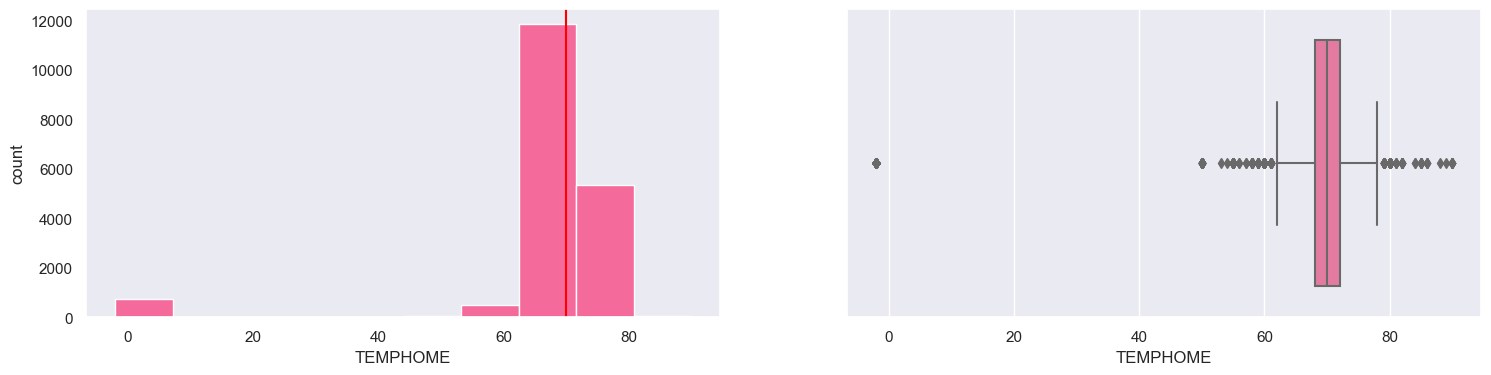

TOTSQFT_EN
Skew : 1.71


KWH
Skew : 2.62


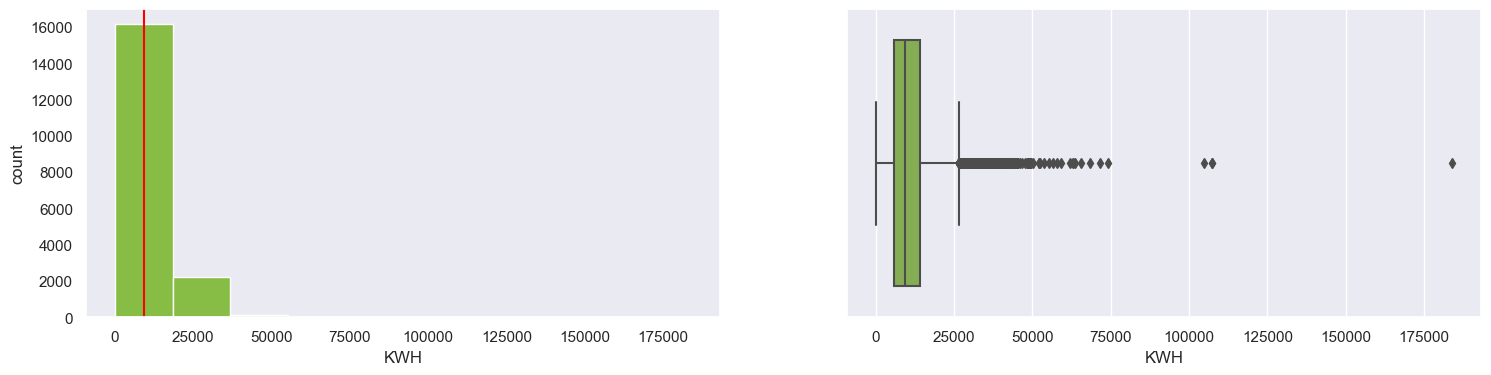

DOLLAREL
Skew : 2.13


GWT
Skew : 0.4


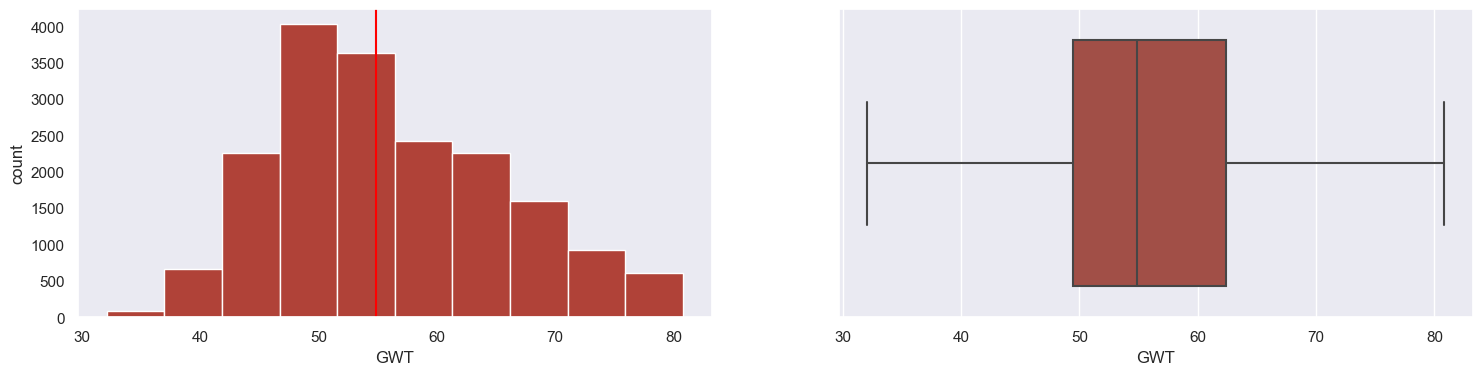

In [20]:
# Getting the list of Numeric columns that should be represented in the plot 
selected_cols=["TEMPHOME","TOTSQFT_EN","KWH","DOLLAREL","GWT"]
sns.set(font_scale=1)
# Setting the colors to be used in the plot
colors=[ "#f46a9b", "#ef9b20", "#87bc45", "#27aeef","#b04238"]
# Enumerating through the columns
for inx,col in enumerate(selected_cols):
    # Printing the column and its skew
    print(col)
    print('Skew :', round(RECS_df[col].skew(), 2))
    median_val = RECS_df[col].median()
    plt.figure(figsize = (18, 4))
    plt.subplot(1, 2, 1)
    color = 'Red'
    # Plotting the Median line
    plt.axvline(median_val, color=color,label='Median value')
    RECS_df[col].hist(grid=False,color= colors[inx])
    plt.xlabel(RECS_df[col].name)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=RECS_df[col],color= colors[inx])
    plt.show()

##### ***Observation:***  The Histogram and the boxplot indicates that the features like TempHome, ToatL SquareFeet, KWH, Dollar all have many outliers. GWT which represents the Ground Water Temperature does not seem to have many outliers.The Median is represented by the Red line in the plot and indicates how the data is skewed in these columns.

#### ***Plot4:*** Histogram Plot

[Text(0.5, 1.0, 'Hist Plot of Total Area')]

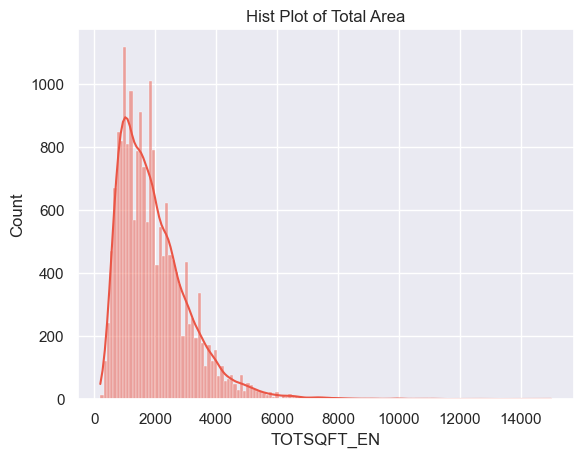

In [21]:
# Hist plot on Total household area
sns.histplot(RECS_df, x="TOTSQFT_EN", color="#ea5545", kde=True).set(title='Hist Plot of Total Area')


##### ***Observation:***  The Histogram plot indicates that data in the Squarefeet area of houshold is skewed to the right and the presence of outliers on the right. This means there are only a few houses with area greater than 6000 ft.

#### ***Plot5:*** Count Plot

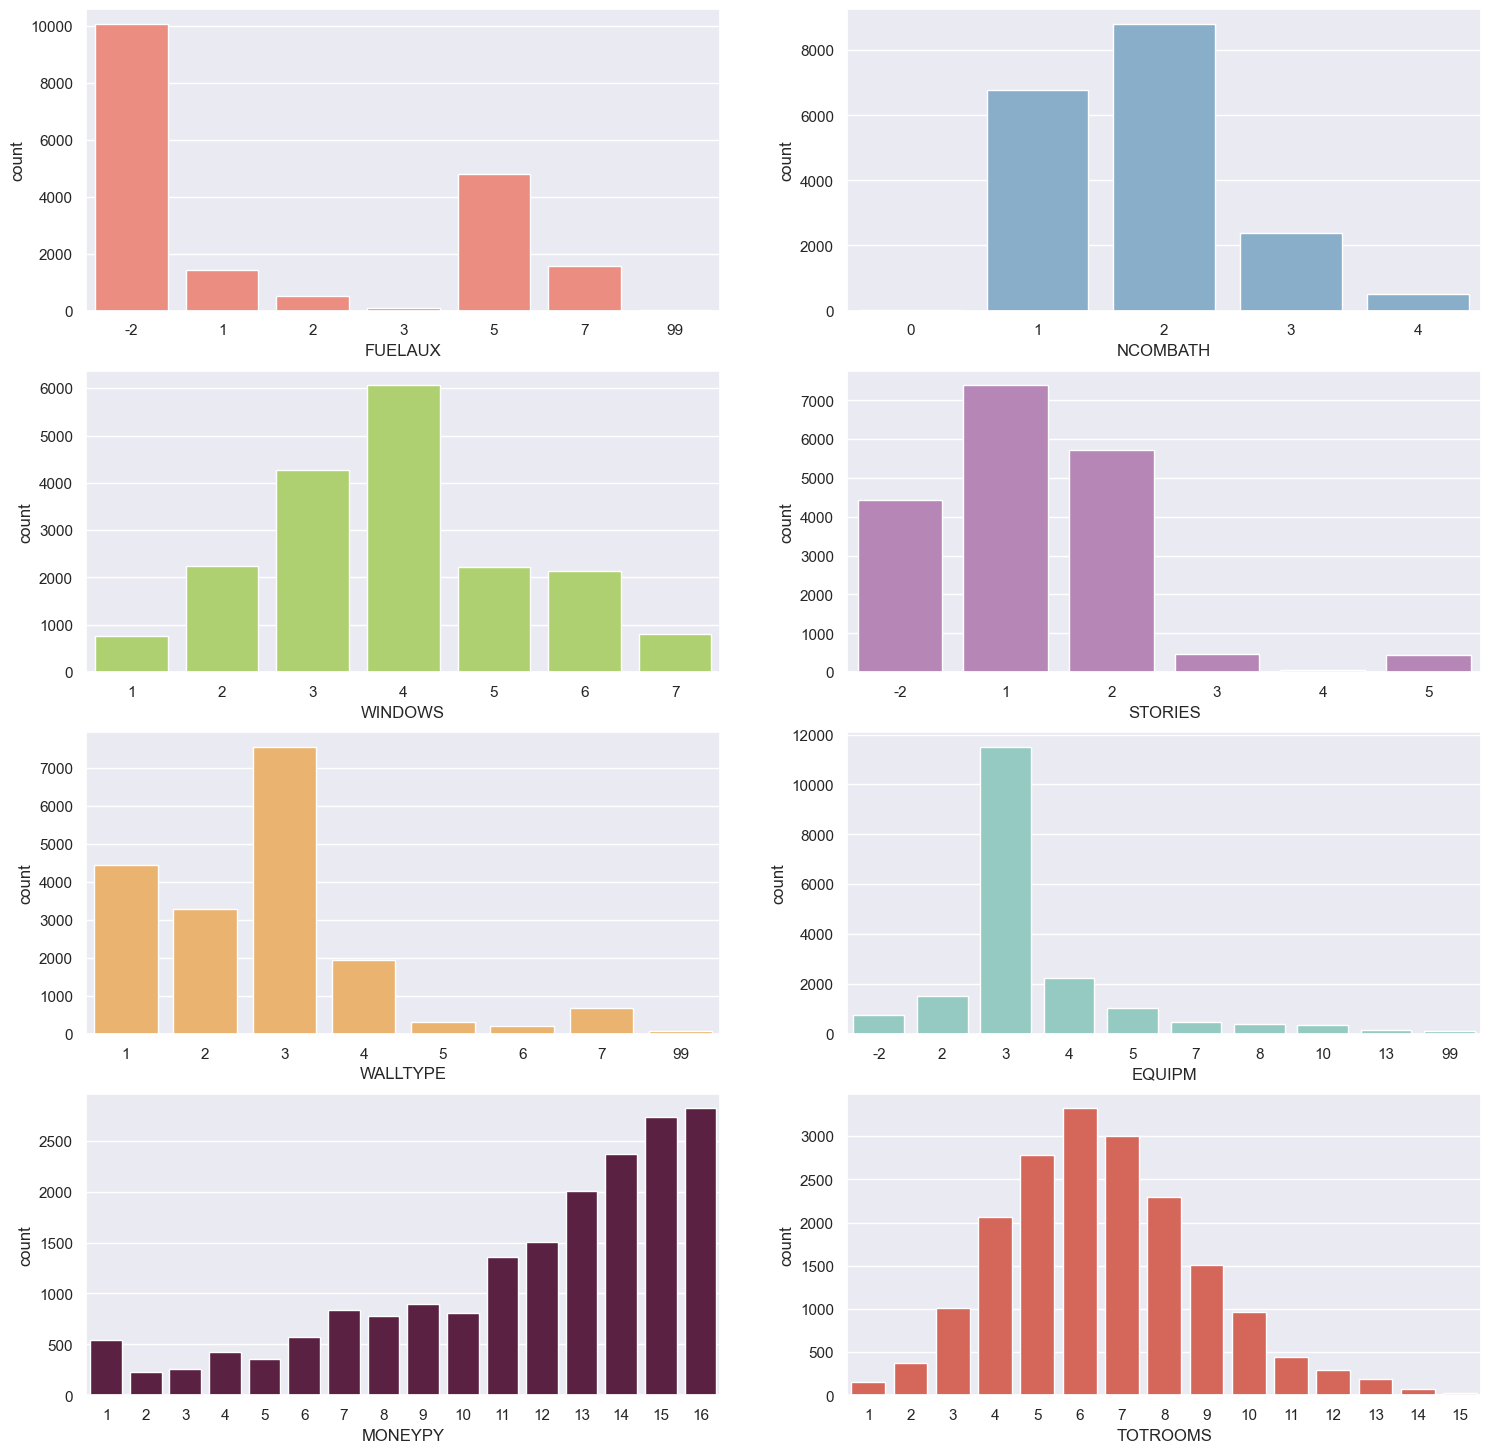

In [22]:
# Getting the list of columns on which count plot will be plotted
count_cols=["FUELAUX","NCOMBATH","WINDOWS","STORIES","WALLTYPE","EQUIPM","MONEYPY","TOTROOMS"]
# Assigning colors to the columsn to be used in the plot
colors2=["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a",  "#8bd3c7","#631844","#ea5545"]
# Setting dimensions to be used in the sub plot
yaxis=int(len(count_cols)/4)
xaxis=int(len(count_cols)/2)
fig, axes = plt.subplots(xaxis, yaxis, figsize = (18, 18))
# Enumerating through the list of columns and plotting them using countplot
for inx,col in enumerate(count_cols):
    # Getting the quotient and Reminder to be used in the for loop
    inx1=inx//2
    inx2=inx%2
    # Plotting countplot
    sns.countplot(ax = axes[inx1, inx2], x =col , data = RECS_df, color = colors2[inx])


##### ***Observation:***  The Countplot shows the count of observations for each value in the daatset. For instance, most household seem to have 4 windows followed by 3. The other columns such as WallType, EquipM contains label values and we have to refer to the column guide to see what they represent. As an instance, Most household seems to have " Siding (aluminum, fiber cement, vinyl, or steel) " type wall and central Furnace Heat equipment.

#### ***Plot6:*** Pair Plot

<Figure size 1800x1800 with 0 Axes>

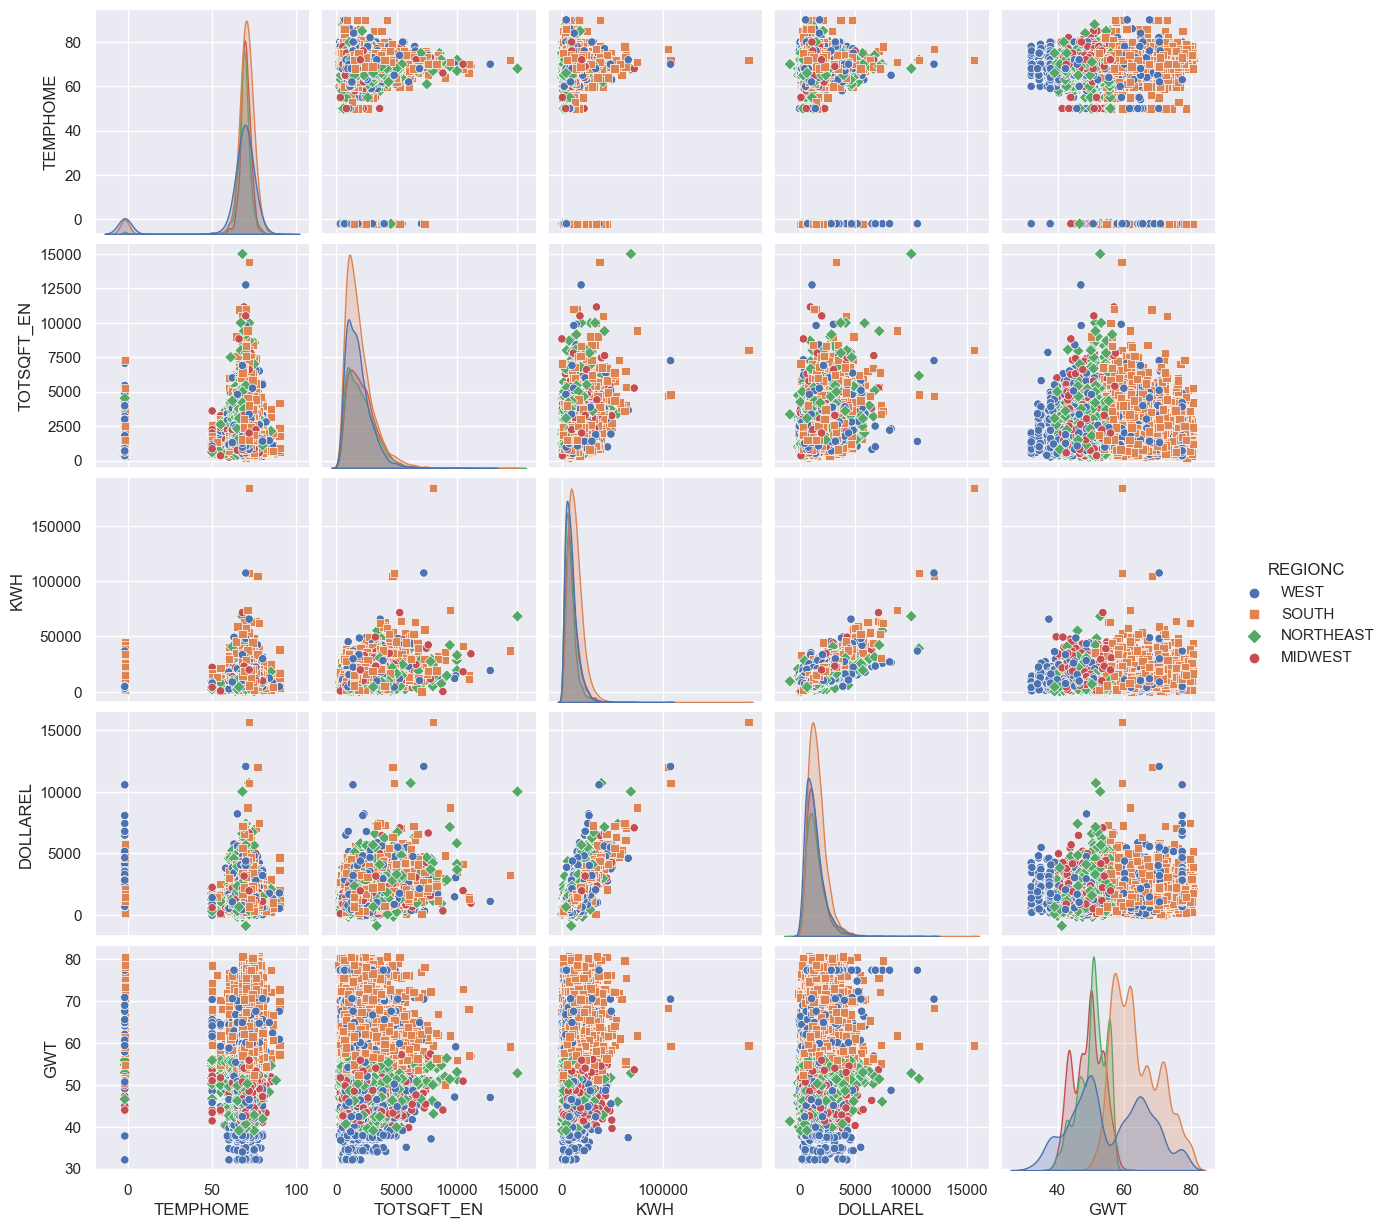

In [23]:
# Getting the list of columns to be used in Pairplot
pair_cols=["TEMPHOME","TOTSQFT_EN","KWH","DOLLAREL","GWT","REGIONC"]
plt.figure(figsize=(18,18))
# Plotting the pairplot based on the Region
sns.pairplot(data=RECS_df[pair_cols],hue="REGIONC",markers=["o", "s", "D","o"])
plt.show()

##### ***Observation:***   The pairplot has many interesting observations:
##### 1. There is a positive relationship between KWH and DOLLAREL
##### 2. The Home temperature does not have a correlation with any of the fields in the plot.
##### 3. The Ground water temperature seems to be higher in southern states than  in the Northeast or west.
##### 4. The bigger the size of the household, higher the electric bill is , as there appears to be a positive correlation between these two.
##### 5. Most of the energy usage(KWH) is from the southern states 



#### ***Plot7:*** Pie plot of Climate zone

In [24]:
# Creating a new dataframe grouped by the climate zone
RECS_df_climate=RECS_df.groupby(["BA_climate"]).count()["state_postal"].sort_values(ascending=False)[:-2].reset_index()
RECS_df_climate

BA_climate  state_postal
0         Cold          7116
1  Mixed-Humid          5579
2    Hot-Humid          2545
3      Hot-Dry          1577
4       Marine           911
5    Very-Cold           572

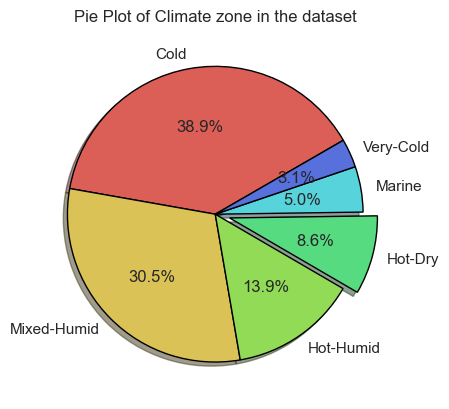

<Figure size 2000x1500 with 0 Axes>

In [25]:
# Using explode to highlight the Hot-dry zone
explode=[0,0,0,0.1,0,0]
# Creating Pie chart with shadow enabled and displaying percent details.
plt.pie(RECS_df_climate["state_postal"],labels=RECS_df_climate["BA_climate"],explode=explode,shadow=True, startangle=30,
        autopct="%1.1f%%",wedgeprops={'edgecolor':'black'},
       colors=sns.color_palette("hls", 8))
plt.title("Pie Plot of Climate zone in the dataset")
plt.figure(figsize=(20, 15))
plt.show()

##### ***Observation :***  The Pie plot indicates that most of the households in the dataset are from Cold and Mixed-Humid climate. We may have to study the states where these holuseholds are located to learn more about  the distribution.

#### ***Plot8:*** Regression Plot of Total Area vs Electric Bill

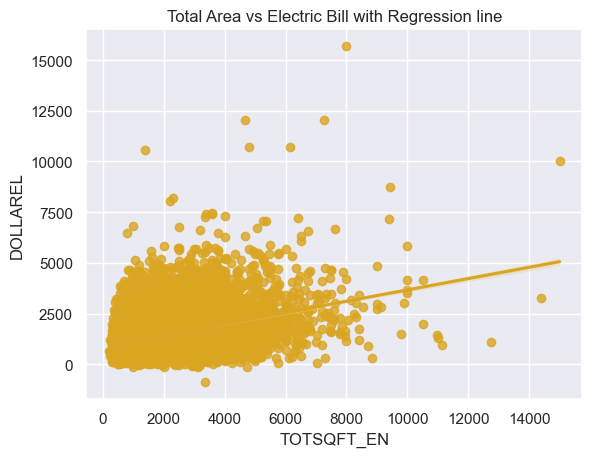

In [26]:
# Using regplot from seaborn to plot Total Area vs Electric Bill
sns.regplot(x='TOTSQFT_EN',y= "DOLLAREL", data = RECS_df,color="goldenrod")
# Setting the size of the plot and the title
sns.set(rc={"figure.figsize": (8, 8)})
plt.title('Total Area vs Electric Bill with Regression line')
plt.show()

##### ***Observation:*** The plot8 indicates positive relation between Total area and the electric bill in dollars which indicates, bigger the area higher the bill can be, though there are some exceptions.

#### ***Plot9:*** Regression Plot of AC Usage vs Electric Bill

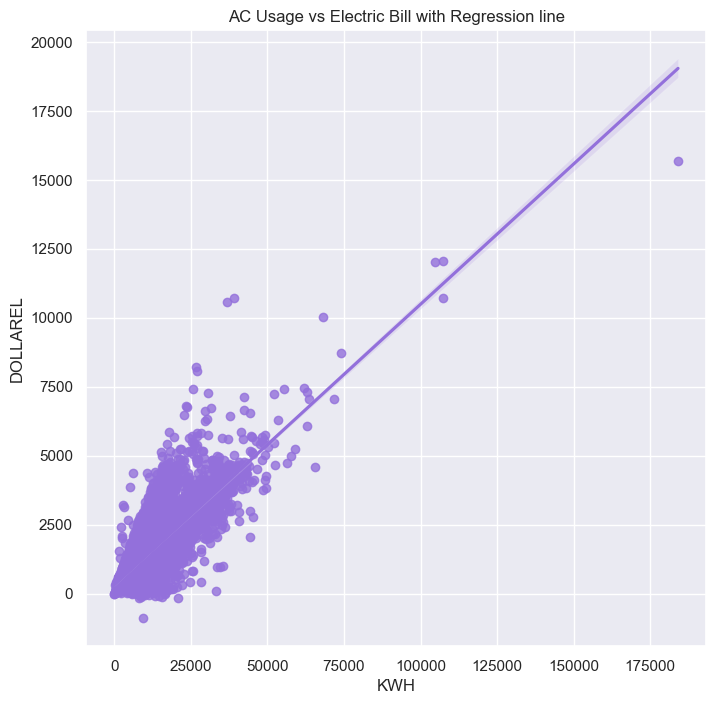

In [27]:
# Using regplot from seaborn to plot the AC Usage vs Electric Bill
sns.regplot(x='KWH',y= "DOLLAREL", data = RECS_df,color="mediumpurple")
# Setting the size of the plot and the title
sns.set(rc={"figure.figsize": (6, 6)})
plt.title('AC Usage vs Electric Bill with Regression line')
plt.show()

##### ***Observation:*** The plot9  indicates positive relation between AC Usage  and the electric bill in dollars.Though in some cases, even though the usage is very less, the bill looks higher which can be an outlier. 

In [28]:
# Getting list of columns to be used in Correlation Matrix
corr_cols=["TEMPHOME","TOTSQFT_EN","KWH","DOLLAREL","GWT","FUELAUX","NCOMBATH","WINDOWS","STORIES","WALLTYPE","EQUIPM","MONEYPY","TOTROOMS"]
# Creating a correlation matrix 
corr_matrix = RECS_df[corr_cols].corr().round(2)
corr_matrix


TEMPHOME  TOTSQFT_EN   KWH  DOLLAREL   GWT  FUELAUX  NCOMBATH  \
TEMPHOME        1.00        0.08  0.06     -0.01 -0.26     0.14      0.01   
TOTSQFT_EN      0.08        1.00  0.39      0.38 -0.10     0.14      0.58   
KWH             0.06        0.39  1.00      0.84  0.20     0.13      0.38   
DOLLAREL       -0.01        0.38  0.84      1.00  0.14     0.12      0.34   
GWT            -0.26       -0.10  0.20      0.14  1.00    -0.13      0.10   
FUELAUX         0.14        0.14  0.13      0.12 -0.13     1.00      0.08   
NCOMBATH        0.01        0.58  0.38      0.34  0.10     0.08      1.00   
WINDOWS         0.06        0.60  0.32      0.34 -0.08     0.19      0.46   
STORIES         0.06        0.47  0.24      0.25 -0.10     0.17      0.36   
WALLTYPE       -0.03       -0.01 -0.01      0.00  0.04    -0.01     -0.00   
EQUIPM          0.15       -0.02  0.03      0.02 -0.02     0.04     -0.03   
MONEYPY         0.01        0.38  0.19      0.22 -0.05     0.09      0.37   
TOTROOMS        0.08        0.67  0.40      0.37 -0.06     0.16      0.61   

            WINDOWS  STORIES  WALLTYPE  EQUIPM  MONEYPY  TOTROOMS  
TEMPHOME       0.06     0.06     -0.03    0.15     0.01      0.08  
TOTSQFT_EN     0.60     0.47     -0.01   -0.02     0.38      0.67  
KWH            0.32     0.24     -0.01    0.03     0.19      0.40  
DOLLAREL       0.34     0.25      0.00    0.02     0.22      0.37  
GWT           -0.08    -0.10      0.04   -0.02    -0.05     -0.06  
FUELAUX        0.19     0.17     -0.01    0.04     0.09      0.16  
NCOMBATH       0.46     0.36     -0.00   -0.03     0.37      0.61  
WINDOWS        1.00     0.53      0.00   -0.01     0.36      0.66  
STORIES        0.53     1.00     -0.01   -0.01     0.35      0.54  
WALLTYPE       0.00    -0.01      1.00    0.01    -0.00     -0.01  
EQUIPM        -0.01    -0.01      0.01    1.00    -0.04     -0.02  
MONEYPY        0.36     0.35     -0.00   -0.04     1.00      0.37  
TOTROOMS       0.66     0.54     -0.01   -0.02     0.37      1.00

#### ***Plot10:*** HeatMap of Correlation Matrix

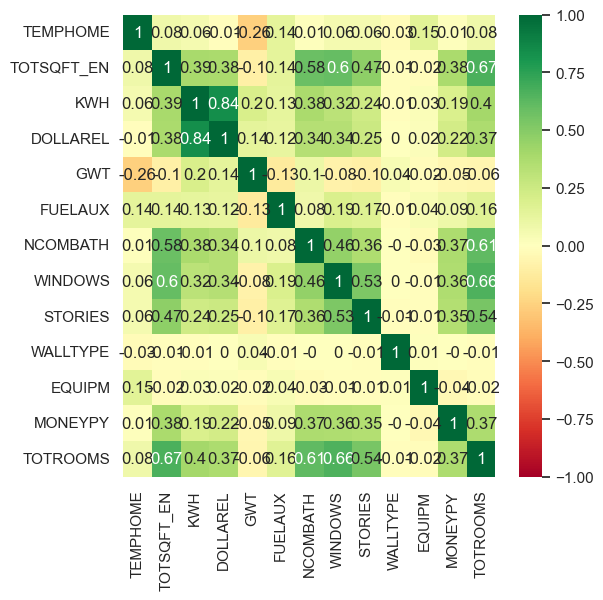

In [29]:

# Creating a HeatMap using Seaborn with annotation turned on 
sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0,cmap ='RdYlGn')
sns.set(font_scale=1)
# setting the size of the plot
sns.set(rc={"figure.figsize": (14, 14)})
plt.show()

##### ***Observation:*** The heatmap indicates a strong correlation between KWH and DOLLAREL columns. Also there is a positive correlation between the number of Windows and Total squarefoot area of household, number of rooms in the house and number of Bathrooms. These will be explored further in the project. Also there is a negative correlation between Home temperature and Ground water temperature.

### 6. Conclusions from EDA

##### The Exploratory data analysis of the dataset  indicates that many columns are misinterpreted as Numbers, so they should be all be converted to labels. Also the negative values should be treated that indicates the presence of missing values as there are no nulls in the dataset. There are about 300+ columns in the initial dataframe of which most of the features are not very helpful. The histogram represents imbalanced distribution of the data indicating the presence of outliers which has to be treated. The pie plot indicates that most of the household in the dataset are from Cold and Humid climate. Further research is required to get more insights on this distribution.The Regression plot can confirm that some features have a positive relationship with the ekectricity cost in dollars..

## Data Preparation

In [30]:
# Printing top 5 rows of the Dataframe
RECS_df.head()

DOEID    REGIONC            DIVISION  STATE_FIPS state_postal  \
0  100001       WEST      Mountain South          35           NM   
1  100002      SOUTH  West South Central           5           AR   
2  100003       WEST      Mountain South          35           NM   
3  100004      SOUTH      South Atlantic          45           SC   
4  100005  NORTHEAST     Middle Atlantic          34           NJ   

       state_name   BA_climate IECC_climate_code UATYP10  HDD65  CDD65  \
0      New Mexico    Mixed-Dry                4B       U   3844   1679   
1        Arkansas  Mixed-Humid                4A       U   3766   1458   
2      New Mexico    Mixed-Dry                4B       U   3819   1696   
3  South Carolina  Mixed-Humid                3A       U   2614   1718   
4      New Jersey  Mixed-Humid                4A       U   4219   1363   

   HDD30YR_PUB  CDD30YR_PUB  TYPEHUQ  CELLAR  CRAWL  CONCRETE  BASEOTH  \
0         4451         1027        2       0      0         1        0   
1         4429         1305        5      -2     -2        -2       -2   
2         4500         1010        5      -2     -2        -2       -2   
3         3229         1653        2       0      1         0        0   
4         4896         1059        5      -2     -2        -2       -2   

   BASEFIN  ATTIC  ATTICFIN  STORIES  PRKGPLC1  SIZEOFGARAGE  KOWNRENT  ...  \
0       -2      0        -2        1         1             2         1  ...   
1       -2     -2        -2       -2        -2            -2         2  ...   
2       -2     -2        -2       -2        -2            -2         2  ...   
3       -2      0        -2        2         1             2         1  ...   
4       -2     -2        -2       -2        -2            -2         2  ...   

   BTUFOSPH  BTUFOWTH  BTUFONEC  BTUFOOTH  GALLONFOSPH  GALLONFOWTH  \
0       0.0       0.0       0.0       0.0          0.0          0.0   
1       0.0       0.0       0.0       0.0          0.0          0.0   
2       0.0       0.0       0.0       0.0          0.0          0.0   
3       0.0       0.0       0.0       0.0          0.0          0.0   
4       0.0       0.0       0.0       0.0          0.0          0.0   

   GALLONFONEC  GALLONFOOTH  DOLFOSPH  DOLFOWTH  DOLFONEC  DOLFOOTH  BTUWD  \
0          0.0          0.0       0.0       0.0       0.0       0.0    0.0   
1          0.0          0.0       0.0       0.0       0.0       0.0    0.0   
2          0.0          0.0       0.0       0.0       0.0       0.0    0.0   
3          0.0          0.0       0.0       0.0       0.0       0.0    0.0   
4          0.0          0.0       0.0       0.0       0.0       0.0    0.0   

   ZWDAMOUNT  TOTALBTUSPH  TOTALDOLSPH  TOTALBTUWTH  TOTALDOLWTH  TOTALBTUOTH  \
0         -2     73942.18       509.15     21241.34       146.26     35017.07   
1         -2      6293.72       250.94     10145.32       261.73      5674.46   
2         -2     16993.72       141.45      5609.36        46.69      2743.10   
3         -2     42812.12       836.64     21061.21       243.37     14574.78   
4         -2      8818.47        84.81     27944.03       268.75     12606.65   

   TOTALDOLOTH   TOTALBTU  TOTALDOL  DBT1  DBT99   GWT  
0      1340.37  144647.71   2656.89  92.9   21.6  58.5  
1       226.25   28034.61    975.00  91.3   16.1  57.2  
2       112.64   30749.71    522.65  92.9   21.6  58.5  
3       607.29   86765.19   2061.77  91.8   25.1  61.5  
4       579.87   59126.93   1463.04  81.8   13.0  55.9  

[5 rows x 789 columns]

In [31]:
# Printing the shape of the dataframe
RECS_df.shape

(18496, 789)

#### 2.1. Drop any features that are not useful for your model building and explain why they are not useful.

In [32]:
# Creating a list to store the columns to be dropped
cols_to_drop=[]

##### There are many columns in the dataset that are not relevant to the problem we are trying to solve. The columns that contains "DOL" in them contains details about caliberated cost of electric usage which is not required. The only column in this regard that will be required is "DOLLAREL" which is the total cost of electricity usage and is the target variable for our model.

##### The columns that contains "BTU" can also be excluded as it contains caliberated electric usage in BTU units which is similar to KWH. Except for the feature"KWH", all other columns that contains "KWH" can be excluded as it contains redundant data.

In [33]:
# Creating list of columns to be dropped
DOL_cols=RECS_df.columns[RECS_df.columns.str.contains(pat = 'DOL')].tolist()
BTU_cols=RECS_df.columns[RECS_df.columns.str.contains(pat = 'BTU')].tolist()
KWH_cols=RECS_df.columns[RECS_df.columns.str.contains(pat = 'KWH')].tolist()

In [34]:
# Creating a function to create a list of all columns to be dropped
def create_cols_to_drop(col_list):
    """
    This function takes the individual list of columns to be dropped and adds them to the final list
    """
    for col in col_list:
        # Add each column from child list to the parent list of columns to be dropped
        cols_to_drop.append(col)
    # returns the final list
    return cols_to_drop


In [35]:
# Adding all the columns to be dropped from previous steps to the final list
cols_to_drop=create_cols_to_drop(DOL_cols)
cols_to_drop=create_cols_to_drop(BTU_cols)
cols_to_drop=create_cols_to_drop(KWH_cols)
# We also drop DOEID which is the Unique Identifier. Also the STATE_FIPS and state_name which
# contains same information as state_postal are also dropped.
cols_to_drop=create_cols_to_drop(["DOEID","STATE_FIPS","state_name"])

In [36]:
# Getting the initial list of columns to be dropped based on our Understanding of the Dataset
len(cols_to_drop)

145

In [37]:
# Creating a new dataframe after dropping the columns
RECS_df2=RECS_df.drop(cols_to_drop, axis=1)
RECS_df2.shape

(18496, 644)

#### 2.2. Transform features if necessary.

In [38]:
"""Getting list of all columns that does not contain Numeric data. There are many columns that contains 
   numbers which are actually categories that are mislabelled as Numbers.
"""
all_label_columns=['state_postal','REGIONC','DIVISION','BA_climate','IECC_climate_code','UATYP10','TYPEHUQ','CELLAR','CRAWL','CONCRETE','BASEOTH','BASEFIN','ATTIC','ATTICFIN','PRKGPLC1','KOWNRENT','STUDIO','WALLTYPE','ROOFTYPE','HIGHCEIL','ORIGWIN','WINFRAME','TREESHAD','ADQINSUL','DRAFTY','UGASHERE','SWIMPOOL','POOLPUMP','FUELPOOL','RECBATH','FUELTUB','ICE','TYPERFR2','LOCRFRI2','WINECHILL','UPRTFRZR','FREEZER','RANGEFUEL','RANGEINDT','OVENFUEL','OVENUSE','OUTGRILLFUEL','OUTGRILL','USECOFFEE','TOAST','TOASTOVN','CROCKPOT','PRSSCOOK','RICECOOK','BLENDER','APPOTHER','ELFOOD','LPCOOK','UGCOOK','DISHWASH','DWCYCLE','CWASHER','TOPFRONT','WASHTEMP','DRYER','DRYRFUEL','TVTYPE1','TVUSE1','TVTYPE2','TVUSE2','TVTYPE3','TVUSE3','TELLWORK','TLDESKTOP','TLLAPTOP','TLTABLET','TLMONITOR','TLOTHER','ONLNEDUC','INTERNET','INTYPECELL','INTYPEBROAD','INTYPEOTH','SSLIGHT','SSTEMP','SSSECURE','SSTV','SSOTHER','HEATHOME','DNTHEAT','HEATAPT','EQUIPM','FUELHEAT','GEOHP','EQUIPAUXTYPE','EQUIPAUX','FUELAUX','USEEQUIPAUX','BASEHEAT','ATTCHEAT','GARGHEAT','HUMIDTYPE','USEHUMID','ELWARM','UGWARM','LPWARM','FOWARM','WDWARM','AIRCOND','COOLAPT','ACEQUIPM_PUB','ACEQUIPAUXTYPE_PUB','BASECOOL','ATTCCOOL','GARGCOOL','USECFAN','HOUSEFAN','ATTICFAN','DEHUMTYPE','USEDEHUM','ELCOOL','TYPETHERM','HEATCNTL','COOLCNTL','H2OAPT','H2OMAIN','WHEATSIZ','WHEATBKT','FUELH2O','MORETHAN1H2O','FUELH2O2','ELWATER','FOWATER','LPWATER','SOLWATER','WDWATER','UGWATER','LGTINLED','LGTINCFL','LGTINCAN','LGTOUTANY','LGTOUTLED','LGTOUTCFL','LGTOUTCAN','ELPAY','NGPAY','LPGPAY','FOPAY','SMARTMETER','INTDATAACC','MEDICALDEV','POWEROUT','WHYPOWEROUT','BACKUP','SOLAR','OUTLET','ELECVEH','EVCHRGHOME','ELOTHER','UGOTH','LPOTHER','FOOTHER','USEEL','USENG','USELP','USEFO','USESOLAR','USEWOOD','ALLELEC','HHSEX','EMPLOYHH','EDUCATION','SDESCENT','HOUSEHOLDER_RACE','SCALEB','SCALEG','SCALEE','PAYHELP','NOHEATBROKE','NOHEATEL','NOHEATNG','NOHEATBULK','NOHEATHELP','COLDMA','NOACBROKE','NOACEL','NOACHELP','HOTMA','ENERGYASST','ENERGYASST20','ENERGYASST19','ENERGYASST18','ENERGYASST17','ENERGYASST16','ENERGYASSTOTH','SQFTINCB','SQFTINCA','SQFTINCG','ZACEQUIPAGE','ZADQINSUL','ZAGECDRYER','ZAGECWASH','ZAGEDW','ZAGEFRZR','ZAGERFRI1','ZAGERFRI2','ZAIRCOND','ZAMTMICRO','ZATHOME','ZATTCCOOL','ZATTCHEAT','ZATTIC','ZATTICFAN','ZATTICFIN','ZBACKUP','ZBASECOOL','ZBASEFIN','ZBASEHEAT','ZBASEOTH','ZBEDROOMS','ZBLENDER','ZCABLESAT','ZCELLAR','ZCELLPHONE','ZCOLDMA','ZCOMBODVR','ZCONCRETE','ZCOOKTOP','ZCOOKTOPFUEL','ZCOOKTOPINDT','ZCOOKTOPUSE','ZCOOLAPT','ZCOOLCNTL','ZCRAWL','ZCROCKPOT','ZCWASHER','ZDEHUMTYPE','ZDESKTOP','ZDISHWASH','ZDOOR1SUM','ZDRAFTY','ZDRYER','ZDRYRFUEL','ZDRYRUSE','ZDVD','ZDWASHUSE','ZDWCYCLE','ZEDUCATION','ZELPAY','ZELPERIPH','ZEMPLOYHH','ZENERGYASST','ZENERGYASST16','ZENERGYASST17','ZENERGYASST18','ZENERGYASST19','ZENERGYASST20','ZENERGYASSTOTH','ZEQUIPAGE','ZEQUIPAUXTYPE','ZEQUIPM','ZFOPAY','ZFREEZER','ZFUELAUX','ZFUELH2O','ZFUELH2O2','ZFUELHEAT','ZFUELPOOL','ZFUELTUB','ZGARGCOOL','ZGARGHEAT','ZH2OAPT','ZH2OMAIN','ZHEATAPT','ZHEATCNTL','ZHEATHOME','ZHHAGE','ZHHSEX','ZHIGHCEIL','ZHOTMA','ZHOUSEFAN','ZHUMIDTYPE','ZICE','ZINTERNET','ZINTSTREAM','ZINTYPEBROAD','ZINTYPECELL','ZINTYPEOTH','ZKOWNRENT','ZLGTIN1TO4','ZLGTIN4TO8','ZLGTINCAN','ZLGTINCFL','ZLGTINLED','ZLGTINMORE8','ZLGTOUTANY','ZLGTOUTCAN','ZLGTOUTCFL','ZLGTOUTLED','ZLGTOUTNITE','ZLOCRFRI2','ZLPGPAY','ZMICRO','ZMONEYPY','ZMONPOOL','ZMONTUB','ZMORETHAN1H2O','ZNCOMBATH','ZNGPAY','ZNHAFBATH','ZNHSLDMEM','ZNOACBROKE','ZNOACDAYS','ZNOACEL','ZNOACHELP','ZNOHEATBROKE','ZNOHEATBULK','ZNOHEATDAYS','ZNOHEATEL','ZNOHEATHELP','ZNOHEATNG','ZNUMADULT1','ZNUMADULT2','ZNUMCFAN','ZNUMCHILD','ZNUMDLHP','ZNUMDLHPAC','ZNUMFIREPLC','ZNUMFLOORFAN','ZNUMFREEZ','ZNUMFRIG','ZNUMLAPTOP','ZNUMMEAL','ZNUMPORTAC','ZNUMPORTDEHUM','ZNUMPORTEL','ZNUMPORTHUM','ZNUMSMPHONE','ZNUMTABLET','ZNUMWWAC','ZONLNEDUC','ZORIGWIN','ZOTHROOMS','ZOUTGRILLFUEL','ZOUTLET','ZOVEN','ZOVENFUEL','ZOVENUSE','ZPAYHELP','ZPLAYSTA','ZPOOLPUMP','ZPOWEROUT','ZPRKGPLC1','ZPRSSCOOK','ZRANGE','ZRANGEFUEL','ZRANGEINDT','ZRCOOKUSE','ZRECBATH','ZRICECOOK','ZROOFTYPE','ZROVENUSE','ZSCALEB','ZSCALEE','ZSCALEG','ZSDESCENT','ZSEPDVR','ZSIZEOFGARAGE','ZSIZFREEZ','ZSIZRFRI1','ZSIZRFRI2','ZSMARTSPK','ZSQFTEST','ZSQFTINCA','ZSQFTINCB','ZSQFTINCG','ZSQFTRANGE','ZSSLIGHT','ZSSOTHER','ZSSSECURE','ZSSTEMP','ZSSTV','ZSTORIES','ZSWIMPOOL','ZTELLDAYS','ZTELLWORK','ZTEMPGONE','ZTEMPGONEAC','ZTEMPHOME','ZTEMPHOMEAC','ZTEMPNITE','ZTEMPNITEAC','ZTLDESKTOP','ZTLLAPTOP','ZTLMONITOR','ZTLOTHER','ZTLTABLET','ZTOAST','ZTOASTOVN','ZTOPFRONT','ZTREESHAD','ZTVAUDIOSYS','ZTVCOLOR','ZTVONWD1','ZTVONWD2','ZTVONWD3','ZTVONWE1','ZTVONWE2','ZTVONWE3','ZTVSIZE1','ZTVSIZE2','ZTVSIZE3','ZTVTYPE1','ZTVTYPE2','ZTVTYPE3','ZTVUSE1','ZTVUSE2','ZTVUSE3','ZTYPEGLASS','ZTYPERFR1','ZTYPERFR2','ZTYPETHERM','ZUGASHERE','ZUPRTFRZR','ZUSECFAN','ZUSECOFFEE','ZUSEDEHUM','ZUSEEQUIPAUX','ZUSEHUMID','ZVCR','ZWALLTYPE','ZWASHLOAD','ZWASHTEMP','ZWHEATAGE','ZWHEATBKT','ZWHEATSIZ','ZWHYPOWEROUT','ZWINDOWS','ZWINECHILL','ZWINFRAME','ZYEARMADERANGE','ZTOTROOMS','ZDNTHEAT','ZTYPEHUQ','ZSTUDIO','ZOUTGRILL','ZHOUSEHOLDER_RACE','ZACEQUIPM_PUB','ZACEQUIPAUXTYPE_PUB']

In [39]:
# Getting the list of categorical columns that are mislabelled as Numers
label_nbr_cols=RECS_df[all_label_columns].select_dtypes(include=['number']).columns.tolist()
# Printing sample of such misalebelled columns
label_nbr_cols[:5]

['TYPEHUQ', 'CELLAR', 'CRAWL', 'CONCRETE', 'BASEOTH']

In [40]:
"""
   Many Numeric columns (that represents categorical information) contains negative values for missing
   data. All the negative values are converted to 0.
"""
for col in label_nbr_cols:
    RECS_df2[col]=RECS_df2[col].apply(lambda x: 99 if x<0 else x)

In [41]:
# The datatype of all the categorical columns are converted to "Category"
RECS_df2[all_label_columns]=RECS_df2[all_label_columns].astype("category")

In [42]:
# Getting the True list of Numberic columns
numeric_cols=RECS_df2.select_dtypes(include=['number']).columns.tolist()

In [43]:
"""Treating the negative values in numeric values by converting them to 0. Negative values
   does not have any significance in our dataset. For instance we cannot have negative number of 
   rooms in a household, negative dollar amount etc. All these are converted to 0.
"""
for col in numeric_cols:
    RECS_df2[col]=RECS_df2[col].apply(lambda x: 0 if x<0 else x)

In [44]:
RECS_df2.shape

(18496, 644)

#### 2.3. Engineer new useful features.

In [45]:
""" Creating new fields for Dollar Amount and KWH values from the original dataset. 
    The KWH contains the Electricity usage of the household in KWH units. 
"""
RECS_df2["DOLLAREL"]=RECS_df["DOLLAREL"]
RECS_df2["KWH"]=RECS_df["KWH"]

In [46]:
# Filtering the data based on the analysis done on Outliers in the previous step
RECS_df2=RECS_df2[RECS_df2['TOTSQFT_EN'] < 6000]
RECS_df2=RECS_df2[RECS_df2['KWH'] < 40000]
RECS_df2=RECS_df2[RECS_df2['DOLLAREL'] < 6000]

In [47]:
RECS_df2.shape

(18261, 646)

#### 2.4. Deal with missing data (do not just drop rows or columns without justifying this).

In [48]:
# One way of identifying the columns to be dropped with threshold of 40% of nulls
missing_values_srs=RECS_df2.isnull().mean()
# Getting the list of columns that have 40% of Nulls
cols_to_exclude=missing_values_srs[missing_values_srs>0.4].keys()
cols_to_exclude

Index([], dtype='object')

##### The above results indicates that there are no NaN values in the dataset.All the negative values are already treated in the prior steps

In [49]:
# Printing the shape of the Dataset after excluding Outliers on some Primary columns
RECS_df2.shape

(18261, 646)

#### 2.5. Create dummy variables if necessary.

In [50]:
# Getting a list of all columns that contain string which should be converted to labels
all_char_columns=['REGIONC','DIVISION','state_postal','BA_climate','IECC_climate_code','UATYP10','TYPEHUQ','CELLAR','CRAWL','CONCRETE','BASEOTH','BASEFIN','ATTIC','ATTICFIN','PRKGPLC1','KOWNRENT','YEARMADERANGE','STUDIO','WALLTYPE','ROOFTYPE','HIGHCEIL','DOOR1SUM','ORIGWIN','WINFRAME','TREESHAD','ADQINSUL','DRAFTY','UGASHERE','SWIMPOOL','MONPOOL','POOLPUMP','FUELPOOL','RECBATH','MONTUB','FUELTUB','NUMFRIG','TYPERFR1','ICE','TYPERFR2','LOCRFRI2','WINECHILL','NUMFREEZ','UPRTFRZR','SIZFREEZ','FREEZER','RANGE','COOKTOP','OVEN','RANGEFUEL','RANGEINDT','RCOOKUSE','ROVENUSE','COOKTOPFUEL','COOKTOPINDT','COOKTOPUSE','OVENFUEL','OVENUSE','MICRO','AMTMICRO','OUTGRILLFUEL','OUTGRILL','NUMMEAL','USECOFFEE','TOAST','TOASTOVN','CROCKPOT','PRSSCOOK','RICECOOK','BLENDER','APPOTHER','ELFOOD','LPCOOK','UGCOOK','DISHWASH','DWASHUSE','DWCYCLE','CWASHER','TOPFRONT','WASHLOAD','WASHTEMP','DRYER','DRYRFUEL','DRYRUSE','TVCOLOR','TVSIZE1','TVTYPE1','TVUSE1','TVONWD1','TVONWE1','TVSIZE2','TVTYPE2','TVUSE2','TVONWD2','TVONWE2','TVSIZE3','TVTYPE3','TVUSE3','TVONWD3','TVONWE3','CABLESAT','COMBODVR','SEPDVR','INTSTREAM','PLAYSTA','DVD','VCR','TVAUDIOSYS','DESKTOP','NUMLAPTOP','NUMTABLET','ELPERIPH','NUMSMPHONE','CELLPHONE','TELLWORK','TELLDAYS','TLDESKTOP','TLLAPTOP','TLTABLET','TLMONITOR','TLOTHER','ONLNEDUC','INTERNET','INTYPECELL','INTYPEBROAD','INTYPEOTH','SMARTSPK','SSLIGHT','SSTEMP','SSSECURE','SSTV','SSOTHER','HEATHOME','DNTHEAT','HEATAPT','EQUIPM','FUELHEAT','GEOHP','EQUIPAUXTYPE','EQUIPAUX','FUELAUX','USEEQUIPAUX','NUMPORTEL','NUMFIREPLC','NUMDLHP','BASEHEAT','ATTCHEAT','GARGHEAT','HUMIDTYPE','NUMPORTHUM','USEHUMID','ELWARM','UGWARM','LPWARM','FOWARM','WDWARM','AIRCOND','COOLAPT','ACEQUIPM_PUB','ACEQUIPAUXTYPE_PUB','NUMDLHPAC','NUMWWAC','NUMPORTAC','BASECOOL','ATTCCOOL','GARGCOOL','NUMCFAN','NUMFLOORFAN','USECFAN','HOUSEFAN','ATTICFAN','DEHUMTYPE','NUMPORTDEHUM','USEDEHUM','ELCOOL','TYPETHERM','HEATCNTL','TEMPHOME','TEMPGONE','TEMPNITE','COOLCNTL','TEMPHOMEAC','TEMPGONEAC','TEMPNITEAC','H2OAPT','H2OMAIN','WHEATSIZ','WHEATBKT','WHEATAGE','FUELH2O','MORETHAN1H2O','FUELH2O2','ELWATER','FOWATER','LPWATER','SOLWATER','WDWATER','UGWATER','LGTIN1TO4','LGTIN4TO8','LGTINMORE8','LGTINLED','LGTINCFL','LGTINCAN','LGTOUTANY','LGTOUTNITE','LGTOUTLED','LGTOUTCFL','LGTOUTCAN','ELPAY','NGPAY','LPGPAY','FOPAY','SMARTMETER','INTDATAACC','MEDICALDEV','POWEROUT','WHYPOWEROUT','BACKUP','SOLAR','OUTLET','ELECVEH','EVCHRGHOME','ELOTHER','UGOTH','LPOTHER','FOOTHER','USEEL','USENG','USELP','USEFO','USESOLAR','USEWOOD','ALLELEC','HHSEX','HHAGE','EMPLOYHH','EDUCATION','SDESCENT','HOUSEHOLDER_RACE','SCALEB','SCALEG','SCALEE','PAYHELP','NOHEATBROKE','NOHEATEL','NOHEATNG','NOHEATBULK','NOHEATDAYS','NOHEATHELP','COLDMA','NOACBROKE','NOACEL','NOACDAYS','NOACHELP','HOTMA','ENERGYASST','ENERGYASST20','ENERGYASST19','ENERGYASST18','ENERGYASST17','ENERGYASST16',
                  'ENERGYASSTOTH','SQFTEST','SQFTINCB','SQFTINCA','SQFTINCG','SQFTRANGE']
# Creating dummy values for the columns that are labels and dropping the first column
RECS_df3=pd.get_dummies(RECS_df2, columns=all_char_columns,drop_first=True)

In [51]:
# Printing the shape of the Dataset after creating dummy columns
RECS_df3.shape

(18261, 2627)

##### ***Note:*** The Dataset has  2664 columns which will be further cleansed and less useful features will be excluded.

#### 2.6. Perform any data extraction/selection steps.

##### ***Note:*** The dataset is split into Train and test sets before any feature selection/ extraction is applied. This is to avoid Data Snooping in our model. 

In [52]:
# Defining the Features and Target for the Mutual Info regression and for Model Building
features=RECS_df3.drop(labels=['DOLLAREL'], axis=1)
# Setting the target variable as the Electricity Cost in Dollars
target=RECS_df3['DOLLAREL']

In [53]:
# Creating training and test datasets using 80:20 split
X_train, X_test, Y_train, Y_test = train_test_split(features,target,test_size=0.2,random_state=random_nbr) 

In [54]:
# Printing the size of the Train and Test sets
print(f""" 
The shape of Features: {features.shape}
The shape of Target: {target.shape}
The shape of X_Train: {X_train.shape}
The shape of X_Test: {X_test.shape}
""")

 
The shape of Features: (18261, 2626)
The shape of Target: (18261,)
The shape of X_Train: (14608, 2626)
The shape of X_Test: (3653, 2626)



##### 2.6.1. Thresholding Numerical Feature Variance

In [55]:
# Creating list of Boolean columns that contains Binary data
bool_cols = [col for col in X_train if 
               X_train[col].dropna().value_counts().index.isin([0,1]).all()]
len(bool_cols)

2346

In [56]:
# Creating list of columns that contains non-Binary data
non_bool_cols = [col for col in X_train if ~ X_train[col].dropna().value_counts().index.isin([0,1]).all()]
len(non_bool_cols)

280

In [57]:
# Create thresholder with variance of 0.5
thresholder = VarianceThreshold(threshold=.5)
# Create variance feature matrix on the Numeric columns
X_train_variance = thresholder.fit_transform(X_train[non_bool_cols])

In [58]:
# Getting the list of columns after excluding the features with low variance
X_train_variance_cols=X_train[non_bool_cols].columns[thresholder.get_support()]

In [59]:
# Printing shape of Dataset after excluding features with Low variance
X_train_variance.shape

(14608, 276)

In [60]:
# Creating dataframe of Numerical features
X_train_variance_df=pd.DataFrame(X_train_variance,columns=X_train_variance_cols)

##### 2.6.2. Thresholding Binary Feature Variance 

##### There are about 2300 Binary columns in the dataset after convering Categorical features to dummy values. Hence it is vital to identify the Binary features that are useful in our dataset.

In [61]:
# Creating a Thresolder object for the Binary columns with a Threshold of 60%
thresholder_bin = VarianceThreshold(threshold=(.60 * (1 - .60)))
# Applying the Thresholder object to the Binary features
X_train_bin_variance=thresholder_bin.fit_transform(X_train[bool_cols])

In [62]:
# Getting the list of Binary Features after excluding the features with low variance
X_train_variance_bin_cols=X_train[bool_cols].columns[thresholder_bin.get_support()]

In [63]:
# Printing shape of Dataset after excluding binary features with Low variance
X_train_bin_variance.shape

(14608, 40)

In [64]:
# Creating dataframe of Binary features
X_train_bin_variance_df=pd.DataFrame(X_train_bin_variance,columns=X_train_variance_bin_cols)

##### 2.6.3. Feature Selection by excluding Highly Correlated Features

In [65]:
# Creating correlation Matrix of the Numerical features and taking the absolute values of correlation coefficient
corr_matrix2 = X_train_variance_df.corr().abs()
corr_matrix2

HDD65     CDD65  HDD30YR_PUB  CDD30YR_PUB   STORIES  \
HDD65        1.000000  0.802737     0.986040     0.796382  0.139266   
CDD65        0.802737  1.000000     0.806760     0.965376  0.133686   
HDD30YR_PUB  0.986040  0.806760     1.000000     0.819187  0.142870   
CDD30YR_PUB  0.796382  0.965376     0.819187     1.000000  0.138012   
STORIES      0.139266  0.133686     0.142870     0.138012  1.000000   
...               ...       ...          ...          ...       ...   
GALLONFOOTH  0.049164  0.047363     0.055973     0.054543  0.016181   
DBT1         0.565868  0.654722     0.561854     0.661927  0.076323   
DBT99        0.900183  0.743291     0.915037     0.728737  0.127006   
GWT          0.955101  0.885122     0.954028     0.889609  0.144977   
KWH          0.169069  0.205768     0.168783     0.228585  0.184867   

             SIZEOFGARAGE  BEDROOMS  NCOMBATH  OTHROOMS  TOTROOMS   WINDOWS  \
HDD65            0.005765  0.026489  0.090553  0.079976  0.067642  0.070668   
CDD65            0.047902  0.009428  0.084866  0.064783  0.049225  0.084498   
HDD30YR_PUB      0.015696  0.024736  0.094582  0.083107  0.068998  0.077786   
CDD30YR_PUB      0.037592  0.007662  0.088760  0.060288  0.045295  0.082436   
STORIES          0.393741  0.478363  0.331022  0.380610  0.484952  0.472927   
...                   ...       ...       ...       ...       ...       ...   
GALLONFOOTH      0.005341  0.008842  0.009686  0.017281  0.016059  0.036229   
DBT1             0.102652  0.053184  0.122114  0.015744  0.035516  0.032833   
DBT99            0.018389  0.031301  0.085871  0.100183  0.083861  0.081232   
GWT              0.015923  0.020259  0.093403  0.075180  0.061437  0.076676   
KWH              0.257493  0.387918  0.359541  0.301804  0.388523  0.308383   

             AGERFRI1  SIZRFRI2  AGERFRI2   AGEFRZR     AGEDW  AGECWASH  \
HDD65        0.074226  0.007772  0.050866  0.177815  0.008217  0.047583   
CDD65        0.077861  0.002293  0.041239  0.133395  0.009799  0.034508   
HDD30YR_PUB  0.073724  0.006227  0.048388  0.171206  0.007724  0.046234   
CDD30YR_PUB  0.076147  0.002251  0.039729  0.120756  0.010268  0.035689   
STORIES      0.025148  0.245897  0.239836  0.149377  0.168828  0.235376   
...               ...       ...       ...       ...       ...       ...   
GALLONFOOTH  0.011289  0.000555  0.004809  0.002807  0.014601  0.005814   
DBT1         0.041650  0.037480  0.013667  0.055135  0.037303  0.016819   
DBT99        0.069186  0.010156  0.054786  0.168626  0.013724  0.052905   
GWT          0.078337  0.002760  0.048016  0.157252  0.011880  0.049882   
KWH          0.016637  0.323881  0.278448  0.222261  0.120228  0.117668   

             AGECDRYER  EQUIPAGE  ACEQUIPAGE  NHSLDMEM  NUMCHILD  NUMADULT1  \
HDD65         0.056380  0.224048    0.058757  0.032052  0.011267   0.027798   
CDD65         0.045701  0.254843    0.063120  0.033104  0.024427   0.018469   
HDD30YR_PUB   0.055582  0.232992    0.048007  0.034194  0.012308   0.027587   
CDD30YR_PUB   0.047260  0.258383    0.072227  0.029215  0.022812   0.014770   
STORIES       0.248650  0.003227    0.023268  0.180405  0.118021   0.096105   
...                ...       ...         ...       ...       ...        ...   
GALLONFOOTH   0.012095  0.028774    0.006911  0.013687  0.002190   0.012403   
DBT1          0.015997  0.099844    0.210931  0.025817  0.029077   0.009495   
DBT99         0.061530  0.262534    0.053520  0.048170  0.013923   0.042672   
GWT           0.059573  0.249140    0.054004  0.033080  0.017231   0.023131   
KWH           0.144420  0.067683    0.087200  0.325931  0.212984   0.214819   

             NUMADULT2    ATHOME  ...  CUFEETNGWTH  CUFEETNGCOK  CUFEETNGCDR  \
HDD65         0.004011  0.015533  ...     0.120065     0.007190     0.012738   
CDD65         0.003041  0.007175  ...     0.137167     0.054553     0.033560   
HDD30YR_PUB   0.006913  0.018014  ...     0.116119     0.009420     0.015020   
CDD30YR_PUB   0.003333  0.009136  ...     0.

In [66]:
# Taking the columns in the Upper triangle of Correlation Matrix to avoid redundancy
upper_cols = corr_matrix2.where(np.triu(np.ones(corr_matrix2.shape),k=1).astype(np.bool))

In [67]:
"""Identifying the features that are highly correlated among themselves. If two features are 
   highly correlated, we won't lose much information by removing one of them.
"""
to_drop_cols_threshold = [column for column in upper_cols.columns if any(upper_cols[column] > 0.90)]
# Printing the list of columns dropped at this step
len(to_drop_cols_threshold)

167

In [68]:
# Dropping the Highly correlated features from the dataset
X_train_variance_df=X_train_variance_df.drop(to_drop_cols_threshold,axis=1)

In [69]:
# Printing the shape after dropping Highly correlated features
X_train_variance_df.shape

(14608, 109)

In [70]:
# Creating a reusable function from all the above steps to be resued later. 
def drop_highly_corr_features(df):
    # Creating correlation Matrix of the Numerical features and taking the absolute values of correlation coefficient
    corr_matrix2 = df.corr().abs()
     # Taking the columns in the Upper triangle of Correlation Matrix to avoid redundancy
    upper_cols = corr_matrix2.where(np.triu(np.ones(corr_matrix2.shape),k=1).astype(np.bool))
    """Identifying the features that are highly correlated among themselves. If two features are 
       highly correlated, we won't lose much information by removing one of them.
    """
    to_drop_cols_threshold = [column for column in upper_cols.columns if any(upper_cols[column] > 0.90)]
    # Printing the list of columns dropped at this step
    print(f"Number of columns that will be dropped : {len(to_drop_cols_threshold)} ")
    # Dropping the Highly correlated features from the dataset
    df=df.drop(to_drop_cols_threshold,axis=1)
    return df
    

In [71]:
# After dropping Non-essential Numeric and Binary features, these two are combined based on the index.
merged_df=pd.merge(X_train_variance_df, X_train_bin_variance_df, left_index=True, right_index=True)

In [72]:
# Getting  the list of columns in the Merged Dataframe
merged_cols=merged_df.columns

In [73]:
# Printing the shape of the Merged Dataframe
merged_df.shape

(14608, 149)

##### 2.6.4. Feature selection using Mutual Info Regression

In [74]:
# The datasets are renamed to Train and test sets
X_train=merged_df

In [75]:
# The Testset is extracted to contain the same columns as the Training set.
X_test=X_test[merged_cols]

In [76]:
# Printing the size of the Train and Test sets
print(f""" 
The shape of cleansed X_Train: {X_train.shape}
The shape of cleansed X_Test: {X_test.shape}
""")

 
The shape of cleansed X_Train: (14608, 149)
The shape of cleansed X_Test: (3653, 149)



In [77]:
# Creating a Mutual Info Regression Object on the Training data
mutual_info_regr = mutual_info_regression(X_train, Y_train)
# Converting to Series and extracting columns
mutual_info_regr = pd.Series(mutual_info_regr)
mutual_info_regr.index = X_train.columns
# Sorting the results in Descending Order
mutual_info_regr.sort_values(ascending=False)

KWH            0.848208
BEDROOMS       0.095263
NHSLDMEM       0.087627
TOTSQFT_EN     0.077608
TOTHSQFT       0.074618
                 ...   
ZHIGHCEIL      0.000000
TYPETHERM_2    0.000000
EQUIPAGE       0.000000
TVSIZE1_3      0.000000
GALLONFONEC    0.000000
Length: 149, dtype: float64

In [78]:
# Selecting top 20 percentile features from Mutual info regression object
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns=selected_top_columns.fit(X_train, Y_train)

In [79]:
# Getting the list of columns selected by the Mutual info regression
mutual_info_regr_cols=X_train.columns[selected_top_columns.get_support()]

In [80]:
# Creating new Train and test features based on the columns selected.
X_train_trans=X_train[mutual_info_regr_cols]
X_test_trans=X_test[mutual_info_regr_cols]

In [81]:
# Printing share of the training dataset after applying the Mutual Info Regression
X_train_trans.shape

(14608, 30)

In [82]:
# Creating a Reusable function for further use
def create_mutual_info_regression(X_train, X_test, Y_train, Y_test,percentile=80):
    # Creating a Mutual Info Regression Object on the Training data
    mutual_info_regr = mutual_info_regression(X_train, Y_train)
    # Converting to Series and extracting columns
    mutual_info_regr = pd.Series(mutual_info_regr)
    mutual_info_regr.index = X_train.columns
    # Sorting the results in Descending Order
    mutual_info_regr.sort_values(ascending=False)
    # Selecting top 80 percentile features from Mutual infor regression object
    selected_top_columns = SelectPercentile(mutual_info_regression, percentile=percentile)
    selected_top_columns=selected_top_columns.fit(X_train, Y_train)
    # Getting the list of columns selected by the Mutual infor regression
    mutual_info_regr_cols=X_train.columns[selected_top_columns.get_support()]
    # Creating new Train and test features based on the columns selected.
    X_train_trans=X_train[mutual_info_regr_cols]
    X_test_trans=X_test[mutual_info_regr_cols]
    return X_train_trans,X_test_trans,Y_train, Y_test,mutual_info_regr

##### 2.6.5. Further feature selection by repeating the steps

In [83]:
# Excluding the Highly Correlated Features in the Training Dataset to further remove redundant features
X_train_trans=drop_highly_corr_features(X_train_trans)

Number of columns that will be dropped : 1 


In [84]:
# Applying Mutual Info regression to cleanse further
X_train_trans, X_test_trans, Y_train, Y_test,mutual_info_regr=create_mutual_info_regression(X_train_trans, X_test_trans, Y_train, Y_test)

In [85]:
mutual_info_regr_20=mutual_info_regr.sort_values(ascending=False)[:20]

In [86]:
# Creating a Dataframe to plot the Bar plot 
mutual_info_regr_20=mutual_info_regr_20.reset_index()
mutual_info_regr_20

index         0
0             KWH  0.848205
1        BEDROOMS  0.095415
2        NHSLDMEM  0.087791
3      TOTSQFT_EN  0.075894
4        TOTHSQFT  0.073871
5        TOTCSQFT  0.072287
6        NCOMBATH  0.071793
7         WINDOWS  0.067780
8         ZH2OAPT  0.061331
9        SIZRFRI2  0.059517
10       AGERFRI2  0.058349
11       ZTVONWD3  0.057446
12      ZAGERFRI2  0.054276
13        STORIES  0.052406
14        ZOUTLET  0.047657
15       ZCOOLAPT  0.046814
16  ZOUTGRILLFUEL  0.046331
17       AGECWASH  0.043941
18         ZATTIC  0.043581
19      AGECDRYER  0.042975

In [87]:
# Setting style for Seaborn plot
sns.set_style('darkgrid')
sns.set_context('paper')
# setting the dimensions of the plot
sns.set(font_scale=8)
fig, ax = plt.subplots(figsize=(150, 60))
# Plotting the Barplot
sns.barplot(x='index',y=0,data=mutual_info_regr_20, estimator=np.median)
plt.title('Importance of features in the dataset', fontsize=175)
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
plt.show()

In [88]:
# Printing shape of the Training dataset
X_train_trans.shape

(14608, 23)

##### 2.6.6. Feature Extraction using Principal Component Analysis

In [89]:
# Creating a Pipeline with standardizing the data followed by applying PCA of 90% Variance
pipe_pca=Pipeline(
[
    ('scalar',StandardScaler()),
    ('pca', PCA(n_components=0.90))
])

In [90]:
# Applying the PCA pipeline object on the Training data
X_train_pca = pipe_pca.fit_transform(X_train_trans)
# Printing the number of features in Training data after applying Training Dataset
X_train_pca.shape

(14608, 12)

In [91]:
# Transforming the Test dataset after applying the PCA object
X_test_pca = pipe_pca.transform(X_test_trans)
X_test_pca.shape

(3653, 12)

In [92]:
# Creating a dataframe from PCA extracted data
X_train_pca_df=pd.DataFrame(X_train_pca)
Y_train_df=pd.DataFrame(Y_train.reset_index(drop=True))
train_concat_df=pd.concat([X_train_pca_df, Y_train_df], axis=1)
train_concat_df.shape

(14608, 13)

##### ***Final Results*** : Using various feature selection and extraction methods, the number of features were reduced from 2,664 features to just under 15 while retaining most of the useful information for our model. This not only helps the Model to run faster but saves computation costs as well. This also helps us to shift our focus on the useful features rather than investing the resources and money on collecting non-essential features, thus improving efficiency overall.

## Model Building and Evaluation

##### ***Reason for selecting the Regression model:*** As the  Target variable - ElectricBill cost is a continuous  value, we will build a Regression model in this project. As there are multiple features in the dataset after feature selection and extraction, various Regression models such as Elastic Net, Random Forest Regression, Lasso, Ridge etc. will be used to train the model.

#### 3.1. Training Regression models

In [93]:
# Calculating the metrics using a function
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
def create_regression_metrics(y_obj,predicted_tgt):
    """
    This function takes the Predicted values as input and returns the results of various metrics like R2, 
    MAE, MSE and RMSE
    """
    # using r2_score to calculate the R2
    r2=r2_score(y_obj, predicted_tgt)
    print(f"R2: {r2} ")
    # using mean_absolute_error functionto calculate the MAE
    mae=mean_absolute_error(y_obj,predicted_tgt)
    print(f"MAE: {mae}")
    # using mean_squared_error function to calculate the MSE
    mse=mean_squared_error(y_obj,predicted_tgt)
    print(f"MSE: {mse}")
    # using mean_squared_error function to calculate the RMSE by taking square root of MSE
    rmse= np.sqrt(mean_squared_error(y_obj,predicted_tgt))
    print(f"RMSE: {rmse}")
    return (r2,mae,mse,rmse)

In [94]:
def create_pipeline(regressor_obj):
    """
    This reusable function creates a pipeline object and returns it. 
    It takes the regressor object as argument and resturns the Pipeline with Standard scaler and Regressor
    """
    pipe = Pipeline([
        ('scalar',StandardScaler()),
        ('regressor', regressor_obj)
        ])
    # Returning the pipeline object
    return pipe

In [95]:
def train_model(pipe):
    """
    This Reusable function is to train the model. It takes the pipeline object as input 
    and returns trained object
    """
    pipe=pipe.fit(X_train_new,Y_train_new)
    return pipe

In [96]:
def calculate_accuracy(pipe):
    """
    This reusable function is used to create Accuracy of the Model. It takes the Pipeline object as input
    """
    # Computing the score for the model and printing it
    score=pipe.score(X_test_new, Y_test_new)
    print(f"Model Score is {score}")
    return score


In [97]:
def pipeline_and_accuracy(regressor_obj):
    """
    This function creates a pipeline and prints the accuracy and other metrics by evaluating the
    model.
    """
    # Creating pipeline by using the Regression object
    pipe_reg=create_pipeline(regressor_obj)
    print(pipe_reg)
    # Training The model
    pipe_reg=train_model(pipe_reg)
    # Creating a variable for Prediction
    pred_test=pipe_reg.predict(X_test_new)
    # Calculating the metrics after evaluating the model
    r2,mae,mse,rmse=create_regression_metrics(Y_test_new,pred_test)
    return r2,mae,mse,rmse

In [98]:
# Creating a Dictionary of the Various Regression models and their object instances
regressor_dict={
    'Baseline Regression' : DummyRegressor(strategy='mean'),
    'Ordinary Linear Regression': LinearRegression(),
    'Elastic Net': ElasticNet(),
    'Random Forest Regression': RandomForestRegressor(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Gradient Boost Regression': GradientBoostingRegressor(),
    'K-NeighborsRegressor': KNeighborsRegressor(),
    'Support Vector Regressor': SVR(C=100, gamma=1, kernel='linear'),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Huber_regressor' : HuberRegressor(epsilon=1.35),
    'CatBoost_Regressor': cb.CatBoostRegressor(loss_function='RMSE')
}

In [99]:
# An empty list that stores the model evalation results
regression_results=[]
# Looping through 5 iterations in which each time a new sample dataset is used for testing
for loop in range(5):
    print(f"starting Loop {loop}:")
    # Creating a sample dataset
    sample_df=train_concat_df.sample(n = sample_size, replace = False)
    # Creating a training and test set for the model building. This is taken after PCA extraction
    X_train_new=sample_df.drop(labels=['DOLLAREL'], axis=1)
    Y_train_new=sample_df['DOLLAREL']
    X_test_new=X_test_pca
    Y_test_new=Y_test
    # Creating Polynomial features variable
    pr = PolynomialFeatures(degree = 2, include_bias=True)
    # Fitting the Train and test data for the Polynomial features
    X_train_new = pr.fit_transform(X_train_new)
    X_test_new = pr.transform(X_test_new)
    # Looping through each item in the dictionary to build model from each iteration
    for algorithm, reg_obj in regressor_dict.items():
        print(f"*****Starting to Fit the Model for {algorithm}*****")
        # Building a model and evaluating the metrics
        r2,mae,mse,rmse=pipeline_and_accuracy(reg_obj)
        # Adding a entry to the dictionary for each regression model
        regression_results.append([algorithm,loop,r2,mae,mse,rmse])
        print(f"The score for the model {algorithm} is {r2}")
        print(f"*****Finished Fitting the Model for {algorithm}*****\n")
    print(f"Ended Loop {loop}:")

starting Loop 0:
*****Starting to Fit the Model for Baseline Regression*****
Pipeline(steps=[('scalar', StandardScaler()), ('regressor', DummyRegressor())])
R2: -0.000346827610520295 
MAE: 602.665977021626
MSE: 614907.5092069614
RMSE: 784.1603848747789
The score for the model Baseline Regression is -0.000346827610520295
*****Finished Fitting the Model for Baseline Regression*****

*****Starting to Fit the Model for Ordinary Linear Regression*****
Pipeline(steps=[('scalar', StandardScaler()),
                ('regressor', LinearRegression())])
R2: 0.682058053702646 
MAE: 299.5256882797545
MSE: 195437.1072851927
RMSE: 442.08269281345173
The score for the model Ordinary Linear Regression is 0.682058053702646
*****Finished Fitting the Model for Ordinary Linear Regression*****

*****Starting to Fit the Model for Elastic Net*****
Pipeline(steps=[('scalar', StandardScaler()), ('regressor', ElasticNet())])
R2: 0.616660897599783 
MAE: 343.4021712946094
MSE: 235636.36744027876
RMSE: 485.42390489

74:	learn: 458.3127741	total: 1.19s	remaining: 14.7s
75:	learn: 457.3843207	total: 1.21s	remaining: 14.7s
76:	learn: 456.6531725	total: 1.22s	remaining: 14.7s
77:	learn: 455.7577226	total: 1.24s	remaining: 14.7s
78:	learn: 454.9736574	total: 1.26s	remaining: 14.7s
79:	learn: 454.3133914	total: 1.27s	remaining: 14.6s
80:	learn: 453.6119933	total: 1.29s	remaining: 14.6s
81:	learn: 452.6282000	total: 1.3s	remaining: 14.6s
82:	learn: 451.9685186	total: 1.32s	remaining: 14.6s
83:	learn: 451.1887011	total: 1.34s	remaining: 14.6s
84:	learn: 450.4811474	total: 1.35s	remaining: 14.6s
85:	learn: 449.7725628	total: 1.37s	remaining: 14.6s
86:	learn: 449.0260540	total: 1.39s	remaining: 14.6s
87:	learn: 448.5635835	total: 1.41s	remaining: 14.7s
88:	learn: 447.8911689	total: 1.43s	remaining: 14.7s
89:	learn: 447.1495921	total: 1.45s	remaining: 14.7s
90:	learn: 446.6169246	total: 1.47s	remaining: 14.7s
91:	learn: 445.8556784	total: 1.49s	remaining: 14.7s
92:	learn: 445.1981632	total: 1.51s	remaining: 

235:	learn: 382.1883695	total: 3.92s	remaining: 12.7s
236:	learn: 381.8544497	total: 3.94s	remaining: 12.7s
237:	learn: 381.6115570	total: 3.95s	remaining: 12.7s
238:	learn: 381.4433200	total: 3.96s	remaining: 12.6s
239:	learn: 381.0995760	total: 3.98s	remaining: 12.6s
240:	learn: 380.7542152	total: 3.99s	remaining: 12.6s
241:	learn: 380.4199810	total: 4s	remaining: 12.5s
242:	learn: 380.1724841	total: 4.01s	remaining: 12.5s
243:	learn: 379.8771847	total: 4.03s	remaining: 12.5s
244:	learn: 379.6202532	total: 4.04s	remaining: 12.4s
245:	learn: 379.2956028	total: 4.05s	remaining: 12.4s
246:	learn: 378.9319133	total: 4.06s	remaining: 12.4s
247:	learn: 378.6635227	total: 4.08s	remaining: 12.4s
248:	learn: 378.2397860	total: 4.09s	remaining: 12.3s
249:	learn: 377.9427951	total: 4.1s	remaining: 12.3s
250:	learn: 377.4981357	total: 4.11s	remaining: 12.3s
251:	learn: 377.2261512	total: 4.13s	remaining: 12.3s
252:	learn: 376.9962037	total: 4.14s	remaining: 12.2s
253:	learn: 376.5776927	total: 4

402:	learn: 330.9119749	total: 6.5s	remaining: 9.62s
403:	learn: 330.5839492	total: 6.52s	remaining: 9.62s
404:	learn: 330.3369779	total: 6.55s	remaining: 9.62s
405:	learn: 330.1043301	total: 6.57s	remaining: 9.61s
406:	learn: 329.8721765	total: 6.59s	remaining: 9.6s
407:	learn: 329.6453414	total: 6.6s	remaining: 9.58s
408:	learn: 329.3651195	total: 6.62s	remaining: 9.56s
409:	learn: 329.1675901	total: 6.63s	remaining: 9.54s
410:	learn: 328.7689361	total: 6.65s	remaining: 9.53s
411:	learn: 328.5796908	total: 6.66s	remaining: 9.51s
412:	learn: 328.3496784	total: 6.68s	remaining: 9.49s
413:	learn: 328.2175409	total: 6.69s	remaining: 9.47s
414:	learn: 327.9660443	total: 6.71s	remaining: 9.46s
415:	learn: 327.8016693	total: 6.72s	remaining: 9.44s
416:	learn: 327.5928606	total: 6.74s	remaining: 9.42s
417:	learn: 327.3578228	total: 6.76s	remaining: 9.41s
418:	learn: 326.9746347	total: 6.77s	remaining: 9.39s
419:	learn: 326.5872358	total: 6.79s	remaining: 9.38s
420:	learn: 326.2297796	total: 

556:	learn: 295.4877834	total: 9.26s	remaining: 7.36s
557:	learn: 295.1879373	total: 9.28s	remaining: 7.35s
558:	learn: 294.9921973	total: 9.3s	remaining: 7.34s
559:	learn: 294.6742123	total: 9.33s	remaining: 7.33s
560:	learn: 294.4166618	total: 9.36s	remaining: 7.32s
561:	learn: 294.1715981	total: 9.37s	remaining: 7.3s
562:	learn: 293.9001399	total: 9.39s	remaining: 7.29s
563:	learn: 293.6888832	total: 9.42s	remaining: 7.28s
564:	learn: 293.5216245	total: 9.44s	remaining: 7.27s
565:	learn: 293.2862040	total: 9.47s	remaining: 7.26s
566:	learn: 293.0773027	total: 9.49s	remaining: 7.25s
567:	learn: 292.8453680	total: 9.51s	remaining: 7.24s
568:	learn: 292.5897065	total: 9.53s	remaining: 7.22s
569:	learn: 292.3547634	total: 9.55s	remaining: 7.2s
570:	learn: 292.1734260	total: 9.57s	remaining: 7.19s
571:	learn: 291.9356201	total: 9.59s	remaining: 7.17s
572:	learn: 291.7239412	total: 9.61s	remaining: 7.16s
573:	learn: 291.3594075	total: 9.62s	remaining: 7.14s
574:	learn: 291.0605686	total: 

712:	learn: 264.5799214	total: 12.8s	remaining: 5.14s
713:	learn: 264.3179213	total: 12.8s	remaining: 5.13s
714:	learn: 264.1325121	total: 12.8s	remaining: 5.12s
715:	learn: 263.8377788	total: 12.9s	remaining: 5.11s
716:	learn: 263.6574227	total: 12.9s	remaining: 5.1s
717:	learn: 263.4436151	total: 13s	remaining: 5.09s
718:	learn: 263.2294073	total: 13s	remaining: 5.08s
719:	learn: 262.9660762	total: 13s	remaining: 5.07s
720:	learn: 262.8253580	total: 13.1s	remaining: 5.05s
721:	learn: 262.5967125	total: 13.1s	remaining: 5.04s
722:	learn: 262.4397192	total: 13.1s	remaining: 5.04s
723:	learn: 262.1390798	total: 13.2s	remaining: 5.03s
724:	learn: 261.9305369	total: 13.2s	remaining: 5.02s
725:	learn: 261.6921462	total: 13.3s	remaining: 5s
726:	learn: 261.5688188	total: 13.3s	remaining: 5s
727:	learn: 261.3612547	total: 13.3s	remaining: 4.98s
728:	learn: 261.2118816	total: 13.4s	remaining: 4.97s
729:	learn: 261.0598256	total: 13.4s	remaining: 4.95s
730:	learn: 261.0103038	total: 13.4s	rema

871:	learn: 238.3007987	total: 16.2s	remaining: 2.37s
872:	learn: 238.2115570	total: 16.2s	remaining: 2.35s
873:	learn: 238.0791205	total: 16.2s	remaining: 2.33s
874:	learn: 237.9357476	total: 16.2s	remaining: 2.31s
875:	learn: 237.7423145	total: 16.2s	remaining: 2.3s
876:	learn: 237.6002595	total: 16.2s	remaining: 2.28s
877:	learn: 237.4456583	total: 16.3s	remaining: 2.26s
878:	learn: 237.3062580	total: 16.3s	remaining: 2.24s
879:	learn: 237.1134369	total: 16.3s	remaining: 2.22s
880:	learn: 236.9328352	total: 16.3s	remaining: 2.2s
881:	learn: 236.7693673	total: 16.3s	remaining: 2.18s
882:	learn: 236.6289476	total: 16.3s	remaining: 2.17s
883:	learn: 236.5349020	total: 16.4s	remaining: 2.15s
884:	learn: 236.3399185	total: 16.4s	remaining: 2.13s
885:	learn: 236.1220964	total: 16.4s	remaining: 2.11s
886:	learn: 236.0072264	total: 16.4s	remaining: 2.09s
887:	learn: 235.8464576	total: 16.4s	remaining: 2.07s
888:	learn: 235.7132199	total: 16.4s	remaining: 2.05s
889:	learn: 235.5399190	total:

R2: 0.6286819744923393 
MAE: 336.15971251026554
MSE: 228247.07979926755
RMSE: 477.7521112452226
The score for the model Random Forest Regression is 0.6286819744923393
*****Finished Fitting the Model for Random Forest Regression*****

*****Starting to Fit the Model for Ridge*****
Pipeline(steps=[('scalar', StandardScaler()), ('regressor', Ridge())])
R2: 0.6810060288794471 
MAE: 297.2419252451829
MSE: 196083.78096456284
RMSE: 442.81348326870403
The score for the model Ridge is 0.6810060288794471
*****Finished Fitting the Model for Ridge*****

*****Starting to Fit the Model for Lasso*****
Pipeline(steps=[('scalar', StandardScaler()), ('regressor', Lasso())])
R2: 0.6820622904521588 
MAE: 296.1944183322995
MSE: 195434.5029793478
RMSE: 442.07974730736964
The score for the model Lasso is 0.6820622904521588
*****Finished Fitting the Model for Lasso*****

*****Starting to Fit the Model for Gradient Boost Regression*****
Pipeline(steps=[('scalar', StandardScaler()),
                ('regressor',

105:	learn: 440.0797517	total: 1.22s	remaining: 10.3s
106:	learn: 439.5551662	total: 1.24s	remaining: 10.3s
107:	learn: 438.9597369	total: 1.25s	remaining: 10.3s
108:	learn: 438.4533215	total: 1.26s	remaining: 10.3s
109:	learn: 437.9821786	total: 1.28s	remaining: 10.3s
110:	learn: 437.5791478	total: 1.29s	remaining: 10.3s
111:	learn: 436.8329942	total: 1.3s	remaining: 10.3s
112:	learn: 436.3090483	total: 1.32s	remaining: 10.4s
113:	learn: 435.8447296	total: 1.33s	remaining: 10.3s
114:	learn: 435.2881288	total: 1.34s	remaining: 10.4s
115:	learn: 434.8796330	total: 1.36s	remaining: 10.3s
116:	learn: 434.3764425	total: 1.37s	remaining: 10.3s
117:	learn: 433.9700213	total: 1.38s	remaining: 10.3s
118:	learn: 433.5205025	total: 1.39s	remaining: 10.3s
119:	learn: 432.9557872	total: 1.41s	remaining: 10.3s
120:	learn: 432.4677947	total: 1.42s	remaining: 10.3s
121:	learn: 432.1756223	total: 1.43s	remaining: 10.3s
122:	learn: 431.7174364	total: 1.45s	remaining: 10.3s
123:	learn: 431.0671975	total

261:	learn: 377.6543951	total: 3.74s	remaining: 10.5s
262:	learn: 377.2379479	total: 3.76s	remaining: 10.5s
263:	learn: 376.9471367	total: 3.77s	remaining: 10.5s
264:	learn: 376.6065742	total: 3.79s	remaining: 10.5s
265:	learn: 376.3436872	total: 3.81s	remaining: 10.5s
266:	learn: 375.9604642	total: 3.83s	remaining: 10.5s
267:	learn: 375.5473226	total: 3.86s	remaining: 10.5s
268:	learn: 375.2569200	total: 3.88s	remaining: 10.5s
269:	learn: 374.9457218	total: 3.9s	remaining: 10.5s
270:	learn: 374.5772704	total: 3.93s	remaining: 10.6s
271:	learn: 374.3246780	total: 3.96s	remaining: 10.6s
272:	learn: 374.0059118	total: 3.99s	remaining: 10.6s
273:	learn: 373.7010372	total: 4.01s	remaining: 10.6s
274:	learn: 373.2961026	total: 4.04s	remaining: 10.7s
275:	learn: 372.9550522	total: 4.06s	remaining: 10.7s
276:	learn: 372.6912874	total: 4.09s	remaining: 10.7s
277:	learn: 372.2652619	total: 4.12s	remaining: 10.7s
278:	learn: 372.0037951	total: 4.15s	remaining: 10.7s
279:	learn: 371.8396395	total

415:	learn: 333.7124505	total: 6.83s	remaining: 9.59s
416:	learn: 333.5197204	total: 6.85s	remaining: 9.57s
417:	learn: 333.1889529	total: 6.87s	remaining: 9.56s
418:	learn: 332.9461139	total: 6.89s	remaining: 9.55s
419:	learn: 332.6501032	total: 6.91s	remaining: 9.54s
420:	learn: 332.4333931	total: 6.93s	remaining: 9.54s
421:	learn: 332.1932060	total: 6.96s	remaining: 9.53s
422:	learn: 331.9295056	total: 6.98s	remaining: 9.52s
423:	learn: 331.7552324	total: 7s	remaining: 9.51s
424:	learn: 331.5774375	total: 7.02s	remaining: 9.5s
425:	learn: 331.2536821	total: 7.05s	remaining: 9.5s
426:	learn: 330.9320230	total: 7.08s	remaining: 9.5s
427:	learn: 330.6300183	total: 7.1s	remaining: 9.49s
428:	learn: 330.4382943	total: 7.12s	remaining: 9.48s
429:	learn: 330.2088281	total: 7.14s	remaining: 9.47s
430:	learn: 329.9429336	total: 7.16s	remaining: 9.46s
431:	learn: 329.6514439	total: 7.2s	remaining: 9.47s
432:	learn: 329.3924450	total: 7.23s	remaining: 9.46s
433:	learn: 329.0659365	total: 7.26s

568:	learn: 299.1583265	total: 10.1s	remaining: 7.62s
569:	learn: 298.9376994	total: 10.1s	remaining: 7.61s
570:	learn: 298.7687471	total: 10.1s	remaining: 7.59s
571:	learn: 298.5802609	total: 10.1s	remaining: 7.57s
572:	learn: 298.3288554	total: 10.1s	remaining: 7.55s
573:	learn: 298.0694358	total: 10.2s	remaining: 7.53s
574:	learn: 297.9343239	total: 10.2s	remaining: 7.52s
575:	learn: 297.7467205	total: 10.2s	remaining: 7.5s
576:	learn: 297.5316868	total: 10.2s	remaining: 7.48s
577:	learn: 297.2069852	total: 10.2s	remaining: 7.47s
578:	learn: 296.9185031	total: 10.3s	remaining: 7.45s
579:	learn: 296.7037215	total: 10.3s	remaining: 7.44s
580:	learn: 296.4651912	total: 10.3s	remaining: 7.43s
581:	learn: 296.3100685	total: 10.3s	remaining: 7.41s
582:	learn: 295.9954791	total: 10.3s	remaining: 7.39s
583:	learn: 295.7853650	total: 10.4s	remaining: 7.38s
584:	learn: 295.4438212	total: 10.4s	remaining: 7.37s
585:	learn: 295.2874921	total: 10.4s	remaining: 7.35s
586:	learn: 295.1523647	total

724:	learn: 268.0809609	total: 13.8s	remaining: 5.21s
725:	learn: 267.8957102	total: 13.8s	remaining: 5.2s
726:	learn: 267.6951382	total: 13.8s	remaining: 5.18s
727:	learn: 267.4837809	total: 13.8s	remaining: 5.16s
728:	learn: 267.3564160	total: 13.8s	remaining: 5.14s
729:	learn: 267.2000977	total: 13.8s	remaining: 5.12s
730:	learn: 267.1005021	total: 13.9s	remaining: 5.1s
731:	learn: 266.8463271	total: 13.9s	remaining: 5.08s
732:	learn: 266.5781017	total: 13.9s	remaining: 5.06s
733:	learn: 266.3711050	total: 13.9s	remaining: 5.04s
734:	learn: 266.1268549	total: 13.9s	remaining: 5.02s
735:	learn: 266.0037768	total: 13.9s	remaining: 5s
736:	learn: 265.7930764	total: 14s	remaining: 4.99s
737:	learn: 265.5598373	total: 14s	remaining: 4.97s
738:	learn: 265.3918399	total: 14s	remaining: 4.95s
739:	learn: 265.1282715	total: 14s	remaining: 4.93s
740:	learn: 264.9273775	total: 14.1s	remaining: 4.91s
741:	learn: 264.7574941	total: 14.1s	remaining: 4.89s
742:	learn: 264.5428854	total: 14.1s	rema

885:	learn: 240.5101721	total: 17.3s	remaining: 2.22s
886:	learn: 240.3413806	total: 17.3s	remaining: 2.2s
887:	learn: 240.1549625	total: 17.3s	remaining: 2.18s
888:	learn: 239.9921701	total: 17.3s	remaining: 2.17s
889:	learn: 239.8135323	total: 17.4s	remaining: 2.15s
890:	learn: 239.5986510	total: 17.4s	remaining: 2.13s
891:	learn: 239.4903951	total: 17.4s	remaining: 2.11s
892:	learn: 239.3837677	total: 17.4s	remaining: 2.09s
893:	learn: 239.1564835	total: 17.4s	remaining: 2.07s
894:	learn: 239.0735101	total: 17.5s	remaining: 2.05s
895:	learn: 238.8925529	total: 17.5s	remaining: 2.03s
896:	learn: 238.7484229	total: 17.5s	remaining: 2.01s
897:	learn: 238.5721807	total: 17.5s	remaining: 1.99s
898:	learn: 238.4320820	total: 17.6s	remaining: 1.97s
899:	learn: 238.2624919	total: 17.6s	remaining: 1.95s
900:	learn: 238.2154171	total: 17.6s	remaining: 1.93s
901:	learn: 238.0546103	total: 17.6s	remaining: 1.92s
902:	learn: 237.8524488	total: 17.7s	remaining: 1.9s
903:	learn: 237.6397357	total:

R2: 0.6324296973202208 
MAE: 326.73756791239254
MSE: 225943.37587810322
RMSE: 475.3350143615587
The score for the model Gradient Boost Regression is 0.6324296973202208
*****Finished Fitting the Model for Gradient Boost Regression*****

*****Starting to Fit the Model for K-NeighborsRegressor*****
Pipeline(steps=[('scalar', StandardScaler()),
                ('regressor', KNeighborsRegressor())])
R2: 0.5628242227721245 
MAE: 369.2006526142896
MSE: 268729.4654624276
RMSE: 518.3912281881587
The score for the model K-NeighborsRegressor is 0.5628242227721245
*****Finished Fitting the Model for K-NeighborsRegressor*****

*****Starting to Fit the Model for Support Vector Regressor*****
Pipeline(steps=[('scalar', StandardScaler()),
                ('regressor', SVR(C=100, gamma=1, kernel='linear'))])
R2: 0.6704990166500063 
MAE: 290.1411777745944
MSE: 202542.38166272792
RMSE: 450.04708827269167
The score for the model Support Vector Regressor is 0.6704990166500063
*****Finished Fitting the Mode

121:	learn: 423.9602862	total: 1.91s	remaining: 13.8s
122:	learn: 423.5892327	total: 1.93s	remaining: 13.8s
123:	learn: 423.1506251	total: 1.95s	remaining: 13.8s
124:	learn: 422.5995590	total: 1.97s	remaining: 13.8s
125:	learn: 422.3067342	total: 1.98s	remaining: 13.8s
126:	learn: 421.9158972	total: 2s	remaining: 13.8s
127:	learn: 421.4976205	total: 2.02s	remaining: 13.8s
128:	learn: 421.0236828	total: 2.04s	remaining: 13.8s
129:	learn: 420.6065995	total: 2.06s	remaining: 13.8s
130:	learn: 420.1383776	total: 2.08s	remaining: 13.8s
131:	learn: 419.7947027	total: 2.11s	remaining: 13.9s
132:	learn: 419.3451774	total: 2.16s	remaining: 14.1s
133:	learn: 418.8694008	total: 2.19s	remaining: 14.1s
134:	learn: 418.3557942	total: 2.21s	remaining: 14.2s
135:	learn: 418.0242180	total: 2.24s	remaining: 14.2s
136:	learn: 417.5851731	total: 2.26s	remaining: 14.2s
137:	learn: 417.0397727	total: 2.28s	remaining: 14.2s
138:	learn: 416.6602106	total: 2.3s	remaining: 14.3s
139:	learn: 416.3164705	total: 2

281:	learn: 366.6996809	total: 5.14s	remaining: 13.1s
282:	learn: 366.3839200	total: 5.16s	remaining: 13.1s
283:	learn: 365.9221312	total: 5.18s	remaining: 13.1s
284:	learn: 365.5791099	total: 5.2s	remaining: 13s
285:	learn: 365.3390799	total: 5.22s	remaining: 13s
286:	learn: 365.0331075	total: 5.24s	remaining: 13s
287:	learn: 364.9229881	total: 5.26s	remaining: 13s
288:	learn: 364.5691900	total: 5.28s	remaining: 13s
289:	learn: 364.2936908	total: 5.29s	remaining: 13s
290:	learn: 364.0278055	total: 5.31s	remaining: 12.9s
291:	learn: 363.7166528	total: 5.33s	remaining: 12.9s
292:	learn: 363.1500236	total: 5.35s	remaining: 12.9s
293:	learn: 362.8993589	total: 5.36s	remaining: 12.9s
294:	learn: 362.7508736	total: 5.38s	remaining: 12.9s
295:	learn: 362.3846291	total: 5.4s	remaining: 12.8s
296:	learn: 361.8391543	total: 5.41s	remaining: 12.8s
297:	learn: 361.4705245	total: 5.43s	remaining: 12.8s
298:	learn: 361.2754423	total: 5.45s	remaining: 12.8s
299:	learn: 360.9543432	total: 5.46s	remai

440:	learn: 324.4067684	total: 7.92s	remaining: 10s
441:	learn: 324.2549854	total: 7.95s	remaining: 10s
442:	learn: 323.9850199	total: 7.97s	remaining: 10s
443:	learn: 323.7122046	total: 7.99s	remaining: 10s
444:	learn: 323.6104604	total: 8.01s	remaining: 9.98s
445:	learn: 323.4139148	total: 8.02s	remaining: 9.96s
446:	learn: 323.1786978	total: 8.04s	remaining: 9.95s
447:	learn: 323.0180833	total: 8.05s	remaining: 9.92s
448:	learn: 322.8752372	total: 8.08s	remaining: 9.91s
449:	learn: 322.6749756	total: 8.11s	remaining: 9.91s
450:	learn: 322.5228207	total: 8.14s	remaining: 9.91s
451:	learn: 322.2949204	total: 8.16s	remaining: 9.9s
452:	learn: 322.0253435	total: 8.19s	remaining: 9.89s
453:	learn: 321.9059376	total: 8.21s	remaining: 9.87s
454:	learn: 321.6872896	total: 8.23s	remaining: 9.85s
455:	learn: 321.4704997	total: 8.24s	remaining: 9.84s
456:	learn: 321.2364014	total: 8.27s	remaining: 9.82s
457:	learn: 321.0232344	total: 8.29s	remaining: 9.81s
458:	learn: 320.8455994	total: 8.31s	

597:	learn: 290.4801454	total: 10.7s	remaining: 7.21s
598:	learn: 290.2547643	total: 10.7s	remaining: 7.18s
599:	learn: 290.0947476	total: 10.7s	remaining: 7.16s
600:	learn: 289.9914716	total: 10.8s	remaining: 7.15s
601:	learn: 289.7857448	total: 10.8s	remaining: 7.13s
602:	learn: 289.6439407	total: 10.8s	remaining: 7.11s
603:	learn: 289.4047684	total: 10.8s	remaining: 7.09s
604:	learn: 289.2311241	total: 10.8s	remaining: 7.07s
605:	learn: 289.0114167	total: 10.8s	remaining: 7.05s
606:	learn: 288.8439876	total: 10.9s	remaining: 7.04s
607:	learn: 288.5773889	total: 10.9s	remaining: 7.02s
608:	learn: 288.3912562	total: 10.9s	remaining: 7s
609:	learn: 288.1956588	total: 10.9s	remaining: 6.98s
610:	learn: 287.9834612	total: 10.9s	remaining: 6.97s
611:	learn: 287.8307085	total: 11s	remaining: 6.95s
612:	learn: 287.6825389	total: 11s	remaining: 6.93s
613:	learn: 287.4929920	total: 11s	remaining: 6.92s
614:	learn: 287.3400951	total: 11s	remaining: 6.9s
615:	learn: 287.1122855	total: 11s	remai

755:	learn: 260.6192441	total: 13.3s	remaining: 4.29s
756:	learn: 260.4938036	total: 13.3s	remaining: 4.27s
757:	learn: 260.3433734	total: 13.3s	remaining: 4.25s
758:	learn: 260.0632989	total: 13.3s	remaining: 4.24s
759:	learn: 259.8318872	total: 13.4s	remaining: 4.22s
760:	learn: 259.6077181	total: 13.4s	remaining: 4.2s
761:	learn: 259.4888983	total: 13.4s	remaining: 4.19s
762:	learn: 259.3766648	total: 13.4s	remaining: 4.17s
763:	learn: 259.1647238	total: 13.4s	remaining: 4.15s
764:	learn: 258.9433976	total: 13.5s	remaining: 4.14s
765:	learn: 258.7944377	total: 13.5s	remaining: 4.12s
766:	learn: 258.5734108	total: 13.5s	remaining: 4.1s
767:	learn: 258.3583402	total: 13.5s	remaining: 4.08s
768:	learn: 258.1655817	total: 13.5s	remaining: 4.07s
769:	learn: 257.9782445	total: 13.6s	remaining: 4.05s
770:	learn: 257.7861558	total: 13.6s	remaining: 4.03s
771:	learn: 257.6998935	total: 13.6s	remaining: 4.01s
772:	learn: 257.6206535	total: 13.6s	remaining: 3.99s
773:	learn: 257.4973957	total:

917:	learn: 234.3178311	total: 16s	remaining: 1.43s
918:	learn: 234.1606329	total: 16s	remaining: 1.41s
919:	learn: 233.9709527	total: 16.1s	remaining: 1.4s
920:	learn: 233.8480276	total: 16.1s	remaining: 1.38s
921:	learn: 233.7309117	total: 16.1s	remaining: 1.36s
922:	learn: 233.6951694	total: 16.1s	remaining: 1.34s
923:	learn: 233.5082488	total: 16.1s	remaining: 1.33s
924:	learn: 233.3159396	total: 16.1s	remaining: 1.31s
925:	learn: 233.1990113	total: 16.2s	remaining: 1.29s
926:	learn: 233.1027109	total: 16.2s	remaining: 1.27s
927:	learn: 232.9434314	total: 16.2s	remaining: 1.26s
928:	learn: 232.8508527	total: 16.2s	remaining: 1.24s
929:	learn: 232.7665023	total: 16.3s	remaining: 1.22s
930:	learn: 232.6099349	total: 16.3s	remaining: 1.21s
931:	learn: 232.4331146	total: 16.3s	remaining: 1.19s
932:	learn: 232.2339507	total: 16.3s	remaining: 1.17s
933:	learn: 232.0900473	total: 16.3s	remaining: 1.15s
934:	learn: 231.9769253	total: 16.3s	remaining: 1.14s
935:	learn: 231.7900734	total: 16

R2: 0.19058028776765856 
MAE: 497.13433068710646
MSE: 497545.69656673964
RMSE: 705.3691916767698
The score for the model Decision Tree Regressor is 0.19058028776765856
*****Finished Fitting the Model for Decision Tree Regressor*****

*****Starting to Fit the Model for Huber_regressor*****
Pipeline(steps=[('scalar', StandardScaler()), ('regressor', HuberRegressor())])
R2: 0.6774173865142651 
MAE: 290.01547241740604
MSE: 198289.69902948005
RMSE: 445.2973153180693
The score for the model Huber_regressor is 0.6774173865142651
*****Finished Fitting the Model for Huber_regressor*****

*****Starting to Fit the Model for CatBoost_Regressor*****
Pipeline(steps=[('scalar', StandardScaler()),
                ('regressor',
                 <catboost.core.CatBoostRegressor object at 0x0000027103888130>)])
Learning rate set to 0.052798
0:	learn: 774.9358696	total: 23.4ms	remaining: 23.3s
1:	learn: 758.9671204	total: 46.5ms	remaining: 23.2s
2:	learn: 744.5554071	total: 66.7ms	remaining: 22.2s
3:	lear

140:	learn: 420.0348113	total: 3.22s	remaining: 19.6s
141:	learn: 419.5750030	total: 3.23s	remaining: 19.5s
142:	learn: 419.1438829	total: 3.25s	remaining: 19.5s
143:	learn: 418.8606373	total: 3.27s	remaining: 19.4s
144:	learn: 418.5145760	total: 3.28s	remaining: 19.4s
145:	learn: 417.9577703	total: 3.3s	remaining: 19.3s
146:	learn: 417.6245028	total: 3.31s	remaining: 19.2s
147:	learn: 417.2149850	total: 3.35s	remaining: 19.3s
148:	learn: 416.7904046	total: 3.37s	remaining: 19.2s
149:	learn: 416.3472201	total: 3.4s	remaining: 19.2s
150:	learn: 415.8557512	total: 3.42s	remaining: 19.2s
151:	learn: 415.2841843	total: 3.46s	remaining: 19.3s
152:	learn: 414.7926828	total: 3.49s	remaining: 19.3s
153:	learn: 414.4228807	total: 3.51s	remaining: 19.3s
154:	learn: 414.1098403	total: 3.54s	remaining: 19.3s
155:	learn: 413.8089503	total: 3.56s	remaining: 19.2s
156:	learn: 413.4716303	total: 3.58s	remaining: 19.2s
157:	learn: 413.0554415	total: 3.59s	remaining: 19.1s
158:	learn: 412.7654113	total:

293:	learn: 365.1770194	total: 5.97s	remaining: 14.3s
294:	learn: 364.9278013	total: 5.99s	remaining: 14.3s
295:	learn: 364.7596328	total: 6.01s	remaining: 14.3s
296:	learn: 364.5080454	total: 6.02s	remaining: 14.3s
297:	learn: 364.2306042	total: 6.04s	remaining: 14.2s
298:	learn: 363.9839584	total: 6.06s	remaining: 14.2s
299:	learn: 363.7466708	total: 6.07s	remaining: 14.2s
300:	learn: 363.2373446	total: 6.09s	remaining: 14.1s
301:	learn: 363.0142228	total: 6.11s	remaining: 14.1s
302:	learn: 362.7008110	total: 6.13s	remaining: 14.1s
303:	learn: 362.3884160	total: 6.14s	remaining: 14.1s
304:	learn: 362.2004853	total: 6.16s	remaining: 14s
305:	learn: 361.9277639	total: 6.17s	remaining: 14s
306:	learn: 361.6888449	total: 6.19s	remaining: 14s
307:	learn: 361.3974856	total: 6.21s	remaining: 13.9s
308:	learn: 361.0569154	total: 6.23s	remaining: 13.9s
309:	learn: 360.7825356	total: 6.24s	remaining: 13.9s
310:	learn: 360.5911147	total: 6.26s	remaining: 13.9s
311:	learn: 360.3719411	total: 6.2

459:	learn: 321.6210781	total: 8.28s	remaining: 9.72s
460:	learn: 321.2520471	total: 8.29s	remaining: 9.7s
461:	learn: 321.1513099	total: 8.3s	remaining: 9.67s
462:	learn: 320.9373704	total: 8.32s	remaining: 9.64s
463:	learn: 320.7491186	total: 8.33s	remaining: 9.62s
464:	learn: 320.5117284	total: 8.34s	remaining: 9.6s
465:	learn: 320.2213036	total: 8.35s	remaining: 9.57s
466:	learn: 320.0368345	total: 8.37s	remaining: 9.55s
467:	learn: 319.7825024	total: 8.38s	remaining: 9.52s
468:	learn: 319.5350917	total: 8.39s	remaining: 9.5s
469:	learn: 319.2504634	total: 8.4s	remaining: 9.47s
470:	learn: 318.9461850	total: 8.41s	remaining: 9.45s
471:	learn: 318.8134388	total: 8.43s	remaining: 9.43s
472:	learn: 318.5897347	total: 8.44s	remaining: 9.4s
473:	learn: 318.3956131	total: 8.45s	remaining: 9.38s
474:	learn: 318.1522067	total: 8.46s	remaining: 9.35s
475:	learn: 318.0207543	total: 8.47s	remaining: 9.33s
476:	learn: 317.8586245	total: 8.49s	remaining: 9.3s
477:	learn: 317.6209039	total: 8.5s

614:	learn: 288.9776872	total: 10.6s	remaining: 6.63s
615:	learn: 288.7294446	total: 10.6s	remaining: 6.61s
616:	learn: 288.4332768	total: 10.6s	remaining: 6.6s
617:	learn: 288.2312523	total: 10.6s	remaining: 6.58s
618:	learn: 288.0366381	total: 10.7s	remaining: 6.56s
619:	learn: 287.8529714	total: 10.7s	remaining: 6.54s
620:	learn: 287.7240426	total: 10.7s	remaining: 6.52s
621:	learn: 287.5917714	total: 10.7s	remaining: 6.5s
622:	learn: 287.4530352	total: 10.7s	remaining: 6.49s
623:	learn: 287.2750140	total: 10.7s	remaining: 6.47s
624:	learn: 287.0509995	total: 10.8s	remaining: 6.46s
625:	learn: 286.7904783	total: 10.8s	remaining: 6.44s
626:	learn: 286.6049933	total: 10.8s	remaining: 6.43s
627:	learn: 286.4775248	total: 10.8s	remaining: 6.41s
628:	learn: 286.3553656	total: 10.8s	remaining: 6.4s
629:	learn: 286.1704723	total: 10.9s	remaining: 6.38s
630:	learn: 285.9152429	total: 10.9s	remaining: 6.37s
631:	learn: 285.8095953	total: 10.9s	remaining: 6.35s
632:	learn: 285.6430942	total: 

775:	learn: 258.6669433	total: 13.3s	remaining: 3.85s
776:	learn: 258.4385445	total: 13.4s	remaining: 3.84s
777:	learn: 258.2017431	total: 13.4s	remaining: 3.82s
778:	learn: 257.9638141	total: 13.4s	remaining: 3.8s
779:	learn: 257.8017344	total: 13.4s	remaining: 3.79s
780:	learn: 257.6922689	total: 13.4s	remaining: 3.77s
781:	learn: 257.5234446	total: 13.5s	remaining: 3.75s
782:	learn: 257.2836268	total: 13.5s	remaining: 3.73s
783:	learn: 257.1490708	total: 13.5s	remaining: 3.72s
784:	learn: 256.8390271	total: 13.5s	remaining: 3.7s
785:	learn: 256.7597686	total: 13.5s	remaining: 3.68s
786:	learn: 256.6476455	total: 13.5s	remaining: 3.66s
787:	learn: 256.4117654	total: 13.6s	remaining: 3.65s
788:	learn: 256.1818964	total: 13.6s	remaining: 3.63s
789:	learn: 256.0910349	total: 13.6s	remaining: 3.61s
790:	learn: 255.9194529	total: 13.6s	remaining: 3.59s
791:	learn: 255.7870715	total: 13.6s	remaining: 3.57s
792:	learn: 255.5801973	total: 13.6s	remaining: 3.56s
793:	learn: 255.3772401	total:

938:	learn: 233.1466041	total: 16.6s	remaining: 1.08s
939:	learn: 233.0673060	total: 16.6s	remaining: 1.06s
940:	learn: 232.9882133	total: 16.7s	remaining: 1.04s
941:	learn: 232.8791188	total: 16.7s	remaining: 1.03s
942:	learn: 232.7672982	total: 16.7s	remaining: 1.01s
943:	learn: 232.5654964	total: 16.7s	remaining: 993ms
944:	learn: 232.4460692	total: 16.8s	remaining: 976ms
945:	learn: 232.3430670	total: 16.8s	remaining: 959ms
946:	learn: 232.1245882	total: 16.8s	remaining: 941ms
947:	learn: 232.0160577	total: 16.8s	remaining: 923ms
948:	learn: 231.8717072	total: 16.8s	remaining: 905ms
949:	learn: 231.7329639	total: 16.9s	remaining: 887ms
950:	learn: 231.5792479	total: 16.9s	remaining: 869ms
951:	learn: 231.3841865	total: 16.9s	remaining: 851ms
952:	learn: 231.2051144	total: 16.9s	remaining: 833ms
953:	learn: 231.1520394	total: 16.9s	remaining: 816ms
954:	learn: 231.0097424	total: 16.9s	remaining: 798ms
955:	learn: 230.8823552	total: 16.9s	remaining: 780ms
956:	learn: 230.7768352	tota

8:	learn: 672.1930578	total: 213ms	remaining: 23.5s
9:	learn: 661.9683363	total: 235ms	remaining: 23.3s
10:	learn: 652.1483041	total: 258ms	remaining: 23.2s
11:	learn: 643.7962396	total: 279ms	remaining: 23s
12:	learn: 635.0416107	total: 300ms	remaining: 22.7s
13:	learn: 627.3629742	total: 320ms	remaining: 22.6s
14:	learn: 620.1186136	total: 341ms	remaining: 22.4s
15:	learn: 613.4320826	total: 366ms	remaining: 22.5s
16:	learn: 606.6529837	total: 390ms	remaining: 22.5s
17:	learn: 601.2138024	total: 411ms	remaining: 22.4s
18:	learn: 595.0276725	total: 437ms	remaining: 22.5s
19:	learn: 590.0812602	total: 463ms	remaining: 22.7s
20:	learn: 584.0675157	total: 501ms	remaining: 23.4s
21:	learn: 578.2298400	total: 530ms	remaining: 23.5s
22:	learn: 573.4643685	total: 557ms	remaining: 23.7s
23:	learn: 568.3065599	total: 591ms	remaining: 24s
24:	learn: 563.9264211	total: 621ms	remaining: 24.2s
25:	learn: 559.9623893	total: 643ms	remaining: 24.1s
26:	learn: 556.0592039	total: 664ms	remaining: 23.9s

166:	learn: 412.7261642	total: 3.73s	remaining: 18.6s
167:	learn: 412.3552063	total: 3.75s	remaining: 18.6s
168:	learn: 412.0071262	total: 3.77s	remaining: 18.5s
169:	learn: 411.6164322	total: 3.79s	remaining: 18.5s
170:	learn: 411.3493615	total: 3.81s	remaining: 18.4s
171:	learn: 410.9724735	total: 3.83s	remaining: 18.4s
172:	learn: 410.6272930	total: 3.84s	remaining: 18.4s
173:	learn: 410.2396450	total: 3.86s	remaining: 18.3s
174:	learn: 409.7469718	total: 3.88s	remaining: 18.3s
175:	learn: 409.4209807	total: 3.9s	remaining: 18.3s
176:	learn: 409.0367732	total: 3.92s	remaining: 18.3s
177:	learn: 408.6419927	total: 3.94s	remaining: 18.2s
178:	learn: 408.2141235	total: 3.97s	remaining: 18.2s
179:	learn: 407.8803249	total: 3.99s	remaining: 18.2s
180:	learn: 407.4781195	total: 4.02s	remaining: 18.2s
181:	learn: 407.0881151	total: 4.06s	remaining: 18.2s
182:	learn: 406.6226709	total: 4.1s	remaining: 18.3s
183:	learn: 406.3149957	total: 4.13s	remaining: 18.3s
184:	learn: 405.8518861	total:

330:	learn: 354.1257100	total: 6.99s	remaining: 14.1s
331:	learn: 353.8139279	total: 7s	remaining: 14.1s
332:	learn: 353.4790477	total: 7.01s	remaining: 14s
333:	learn: 353.1518659	total: 7.03s	remaining: 14s
334:	learn: 352.8729243	total: 7.05s	remaining: 14s
335:	learn: 352.7344709	total: 7.06s	remaining: 14s
336:	learn: 352.4625433	total: 7.08s	remaining: 13.9s
337:	learn: 352.2124508	total: 7.09s	remaining: 13.9s
338:	learn: 351.9403456	total: 7.1s	remaining: 13.8s
339:	learn: 351.7002607	total: 7.12s	remaining: 13.8s
340:	learn: 351.2865765	total: 7.13s	remaining: 13.8s
341:	learn: 351.0048909	total: 7.14s	remaining: 13.7s
342:	learn: 350.7521796	total: 7.16s	remaining: 13.7s
343:	learn: 350.4117691	total: 7.17s	remaining: 13.7s
344:	learn: 350.2155846	total: 7.18s	remaining: 13.6s
345:	learn: 349.8719442	total: 7.2s	remaining: 13.6s
346:	learn: 349.7178204	total: 7.21s	remaining: 13.6s
347:	learn: 349.5556943	total: 7.22s	remaining: 13.5s
348:	learn: 349.2454955	total: 7.23s	rema

492:	learn: 312.3899087	total: 9.27s	remaining: 9.54s
493:	learn: 312.2026282	total: 9.29s	remaining: 9.51s
494:	learn: 312.0076718	total: 9.3s	remaining: 9.49s
495:	learn: 311.7140862	total: 9.32s	remaining: 9.47s
496:	learn: 311.5115047	total: 9.33s	remaining: 9.44s
497:	learn: 311.4087787	total: 9.35s	remaining: 9.42s
498:	learn: 310.9657289	total: 9.36s	remaining: 9.4s
499:	learn: 310.7234431	total: 9.38s	remaining: 9.38s
500:	learn: 310.4655842	total: 9.39s	remaining: 9.35s
501:	learn: 310.2568837	total: 9.41s	remaining: 9.34s
502:	learn: 309.9735717	total: 9.43s	remaining: 9.31s
503:	learn: 309.7464541	total: 9.45s	remaining: 9.29s
504:	learn: 309.6091982	total: 9.46s	remaining: 9.28s
505:	learn: 309.4775348	total: 9.48s	remaining: 9.25s
506:	learn: 309.3284976	total: 9.49s	remaining: 9.23s
507:	learn: 308.9445041	total: 9.51s	remaining: 9.21s
508:	learn: 308.7108741	total: 9.52s	remaining: 9.19s
509:	learn: 308.4986597	total: 9.53s	remaining: 9.16s
510:	learn: 308.2280958	total:

657:	learn: 277.5350709	total: 12s	remaining: 6.25s
658:	learn: 277.3524840	total: 12s	remaining: 6.23s
659:	learn: 277.1336722	total: 12s	remaining: 6.21s
660:	learn: 276.9652945	total: 12.1s	remaining: 6.18s
661:	learn: 276.7313860	total: 12.1s	remaining: 6.17s
662:	learn: 276.5227280	total: 12.1s	remaining: 6.14s
663:	learn: 276.1550838	total: 12.1s	remaining: 6.12s
664:	learn: 276.0155628	total: 12.1s	remaining: 6.1s
665:	learn: 275.7771126	total: 12.1s	remaining: 6.08s
666:	learn: 275.5672246	total: 12.1s	remaining: 6.06s
667:	learn: 275.1991076	total: 12.2s	remaining: 6.04s
668:	learn: 275.0686027	total: 12.2s	remaining: 6.02s
669:	learn: 274.7937840	total: 12.2s	remaining: 6s
670:	learn: 274.5964904	total: 12.2s	remaining: 5.98s
671:	learn: 274.4132662	total: 12.2s	remaining: 5.96s
672:	learn: 274.3032774	total: 12.2s	remaining: 5.94s
673:	learn: 273.9777288	total: 12.2s	remaining: 5.92s
674:	learn: 273.7772642	total: 12.3s	remaining: 5.9s
675:	learn: 273.6624839	total: 12.3s	re

813:	learn: 248.3408486	total: 14.5s	remaining: 3.31s
814:	learn: 248.2257318	total: 14.5s	remaining: 3.29s
815:	learn: 247.9759727	total: 14.5s	remaining: 3.28s
816:	learn: 247.8282791	total: 14.5s	remaining: 3.26s
817:	learn: 247.7033111	total: 14.6s	remaining: 3.24s
818:	learn: 247.5442410	total: 14.6s	remaining: 3.22s
819:	learn: 247.4357397	total: 14.6s	remaining: 3.2s
820:	learn: 247.2928324	total: 14.6s	remaining: 3.19s
821:	learn: 247.1069133	total: 14.6s	remaining: 3.17s
822:	learn: 246.9132107	total: 14.6s	remaining: 3.15s
823:	learn: 246.7543743	total: 14.7s	remaining: 3.13s
824:	learn: 246.6603634	total: 14.7s	remaining: 3.11s
825:	learn: 246.3969901	total: 14.7s	remaining: 3.09s
826:	learn: 246.1635923	total: 14.7s	remaining: 3.08s
827:	learn: 246.0428648	total: 14.7s	remaining: 3.06s
828:	learn: 245.8649241	total: 14.7s	remaining: 3.04s
829:	learn: 245.7292913	total: 14.8s	remaining: 3.02s
830:	learn: 245.5887385	total: 14.8s	remaining: 3s
831:	learn: 245.3831774	total: 1

967:	learn: 224.7143870	total: 17.6s	remaining: 580ms
968:	learn: 224.4282734	total: 17.6s	remaining: 562ms
969:	learn: 224.1777448	total: 17.6s	remaining: 544ms
970:	learn: 224.0145527	total: 17.6s	remaining: 526ms
971:	learn: 223.8875834	total: 17.6s	remaining: 508ms
972:	learn: 223.6314346	total: 17.7s	remaining: 490ms
973:	learn: 223.4717448	total: 17.7s	remaining: 472ms
974:	learn: 223.3550473	total: 17.7s	remaining: 454ms
975:	learn: 223.2174859	total: 17.7s	remaining: 435ms
976:	learn: 223.0287651	total: 17.7s	remaining: 417ms
977:	learn: 222.8224827	total: 17.7s	remaining: 399ms
978:	learn: 222.6828431	total: 17.7s	remaining: 380ms
979:	learn: 222.5517138	total: 17.8s	remaining: 362ms
980:	learn: 222.4628781	total: 17.8s	remaining: 344ms
981:	learn: 222.3331758	total: 17.8s	remaining: 326ms
982:	learn: 222.1634870	total: 17.8s	remaining: 308ms
983:	learn: 221.9849530	total: 17.8s	remaining: 290ms
984:	learn: 221.8872701	total: 17.8s	remaining: 271ms
985:	learn: 221.7593154	tota

In [100]:
# Capturing the regression results from the models
regression_results_df=pd.DataFrame(regression_results, columns=["Algorithm","Loop","R2","MAE","MSE","RMSE"])
regression_results_df

Algorithm  Loop        R2         MAE            MSE  \
0          Baseline Regression     0 -0.000347  602.665977  614907.509207   
1   Ordinary Linear Regression     0  0.682058  299.525688  195437.107285   
2                  Elastic Net     0  0.616661  343.402171  235636.367440   
3     Random Forest Regression     0  0.624278  338.415689  230954.172796   
4                        Ridge     0  0.682079  299.505626  195424.303159   
5                        Lasso     0  0.682797  298.577808  194982.794869   
6    Gradient Boost Regression     0  0.632927  326.558084  225637.696834   
7         K-NeighborsRegressor     0  0.554464  373.125799  273868.394656   
8     Support Vector Regressor     0  0.673894  289.005437  200455.327715   
9      Decision Tree Regressor     0  0.227981  495.269020  474555.868356   
10             Huber_regressor     0  0.678688  288.815896  197508.501012   
11          CatBoost_Regressor     0  0.654618  318.141025  212304.351450   
12         Baseline Regression     1 -0.000030  599.452259  614712.681184   
13  Ordinary Linear Regression     1  0.680989  297.268976  196094.459099   
14                 Elastic Net     1  0.619811  338.631621  233699.720821   
15    Random Forest Regression     1  0.628682  336.159713  228247.079799   
16                       Ridge     1  0.681006  297.241925  196083.780965   
17                       Lasso     1  0.682062  296.194418  195434.502979   
18   Gradient Boost Regression     1  0.638239  323.607535  222372.608882   
19        K-NeighborsRegressor     1  0.559829  367.839082  270570.868552   
20    Support Vector Regressor     1  0.674357  287.786966  200170.660736   
21     Decision Tree Regressor     1  0.173687  501.151593  507929.704503   
22             Huber_regressor     1  0.678771  287.700841  197457.396346   
23          CatBoost_Regressor     1  0.650842  314.247869  214625.556787   
24         Baseline Regression     2 -0.000110  598.842642  614761.834632   
25  Ordinary Linear Regression     2  0.678751  298.745812  197470.201383   
26                 Elastic Net     2  0.614448  341.982202  236996.639330   
27    Random Forest Regression     2  0.622450  337.756130  232078.020894   
28                       Ridge     2  0.678758  298.730507  197465.362471   
29                       Lasso     2  0.679870  297.708995  196782.269990   
30   Gradient Boost Regression     2  0.632430  326.737568  225943.375878   
31        K-NeighborsRegressor     2  0.562824  369.200653  268729.465462   
32    Support Vector Regressor     2  0.670499  290.141178  202542.381663   
33     Decision Tree Regressor     2  0.172964  512.758631  508374.373976   
34             Huber_regressor     2  0.674335  289.918990  200184.213156   
35          CatBoost_Regressor     2  0.652041  316.928208  213888.458434   
36         Baseline Regression     3 -0.000656  603.705595  615097.366630   
37  Ordinary Linear Regression     3  0.679302  301.715099  197131.120392   
38                 Elastic Net     3  0.616738  343.654183  235589.206177   
39    Random Forest Regression     3  0.627429  335.700869  229017.496897   
40                       Ridge     3  0.679316  301.703461  197122.721674   
41                       Lasso     3  0.680750  300.344180  196240.949725   
42   Gradient Boost Regression     3  0.632187  328.707594  226092.294472   
43        K-NeighborsRegressor     3  0.553540  371.901368  274436.272937   
44    Support Vector Regressor     3  0.672703  290.119839  201187.681665   
45     Decision Tree Regressor     3  0.190580  497.134331  497545.696567   
46             Huber_regressor     3  0.677417  290.015472  198289.699029   
47          CatBoost_Regressor     3  0.650994  316.842925  214531.764271   
48         Baseline Regression     4 -0.000083  601.331845  614745.487331   
49  Ordinary Linear Regression     4  0.679221  302.293443  197181.109520   
50                 Elastic Net     4  0.619137  341.444941  234114.482826   
51    Random Fore

In [101]:
# Creating a Dataframe to store the results after building various Regression models
regression_results_df=regression_results_df.sort_values(by=["Algorithm","R2"],ascending=False)

In [102]:
# Averaging the results of Regression modelling from each loop
regression_results_df.groupby(["Algorithm"]).mean().drop(["Loop"],axis=1).sort_values(by=["R2"],ascending=False)

R2         MAE            MSE        RMSE
Algorithm                                                                  
Lasso                       0.681246  298.678305  195936.065166  442.646065
Ridge                       0.680084  299.885364  196650.467468  443.452040
Ordinary Linear Regression  0.680064  299.909804  196662.799536  443.465946
Huber_regressor             0.677613  289.095915  198169.246279  445.160463
Support Vector Regressor    0.672954  289.280424  201033.449908  448.366590
CatBoost_Regressor          0.652171  316.557853  213808.248412  462.393160
Gradient Boost Regression   0.633061  327.041681  225555.521921  474.923275
Random Forest Regression    0.625661  336.813939  230104.056107  479.689528
Elastic Net                 0.617359  341.823024  235207.283319  484.980202
K-NeighborsRegressor        0.557465  370.583275  272023.860783  521.555109
Decision Tree Regressor     0.185893  503.163257  500427.140892  707.338928
Baseline Regression        -0.000245  601.199663  614844.975797  784.120506

##### ***Interpretation of the results:*** The above results indicate that Lasso, Ridge and Ordinary Linear regression have better R2 values and they can be a better model for predicting the Electricity bill compared to other models.

#####  The R2 represents the goodness of the fit of the model, how good the regression line fits for the dataset. It is also called Coefficient of determination and it ranges between 0 and 1. In this case the value of 0.68 represents that the 68% of the variablity of the target variable is explained by the regression model.

##### The Mean squared error is the squared value of the difference between the actual value and the predicted values by the model. Taking its square root, we get RMSE. It can range between 0 and infinity.  Smaller RMSE values indicates a better model.

##### Mean Absolute Error is the sum of absolute difference between the actual values and the values predicted by the model. It can range between 0 and infinity.  Smaller values indicates better model. 

#### 3.3.Hyperparameter Tuning

In [103]:
# Creating a Search space with Regression models with their hyperparameters
search_space = [
# ElasticNet Regression
{
"regressor": [ElasticNet()],
"regressor__alpha": [0.01, 0.05, 0.1, 0.25, 0.5, 0.8,0.9]
},
# Ridge Regression
{
"regressor": [Ridge()],
"regressor__alpha": [0.01, 0.05, 0.1, 0.25, 0.5, 0.8,0.9]
},
# Lasso Regression
{
"regressor": [Lasso()],
"regressor__alpha": [0.01, 0.05, 0.1, 0.25, 0.5, 0.8,0.9]
},
# Gradient Boost Regression
{
"regressor": [GradientBoostingRegressor()],
"regressor__alpha": [0.01, 0.05, 0.1, 0.25, 0.5, 0.8,0.9]
},
# K Neighbors Regression
{
"regressor": [KNeighborsRegressor()],
"regressor__n_neighbors": [9, 12],
"regressor__weights": ['distance'],
"regressor__p": [1],
},
# Decision Tree Regression
{
"regressor": [DecisionTreeRegressor()],
"regressor__max_depth": [7],
"regressor__max_features": ['auto', 'sqrt'],
"regressor__min_samples_leaf": [7],
"regressor__min_samples_split": [0.1],
"regressor__criterion": ['mse']  
},
# Random Forest Regression
{
"regressor": [RandomForestRegressor()],
"regressor__n_estimators": [100],
"regressor__max_depth": [10],
"regressor__max_features": ['auto', 'sqrt'],
"regressor__min_samples_leaf": [4],
"regressor__min_samples_split": [0.1]
},
]

In [104]:
# Creating a base pipeline with simple linear regression
pipe_grid = Pipeline([
        ('scalar',StandardScaler()),
        ('regressor', LinearRegression())
        ])

In [105]:
# Creating a new GridSearch object using the same pipeline from above step with 5 folder cross-validation
regressor_gridsearch = GridSearchCV(pipe_grid, search_space, cv=5 )

In [106]:
# Fitting the gridsearch on the same pipeline from above step
best_model=train_model(regressor_gridsearch)
# Printing the Best Model object
best_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scalar', StandardScaler()),
                                       ('regressor', LinearRegression())]),
             param_grid=[{'regressor': [ElasticNet()],
                          'regressor__alpha': [0.01, 0.05, 0.1, 0.25, 0.5, 0.8,
                                               0.9]},
                         {'regressor': [Ridge()],
                          'regressor__alpha': [0.01, 0.05, 0.1, 0.25, 0.5, 0.8,
                                               0.9]},
                         {'regressor': [Lasso(alpha=0.9)],
                          'regressor__alpha': [0.01, 0.05, 0.1, 0.25, 0.5...
                          'regressor__max_depth': [7],
                          'regressor__max_features': ['auto', 'sqrt'],
                          'regressor__min_samples_leaf': [7],
                          'regressor__min_samples_split': [0.1]},
                         {'regressor': [RandomForestRegressor()],
       

In [107]:
# Printing all the Parameters of the best model object
best_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scalar', StandardScaler()), ('regressor', Lasso(alpha=0.9))],
 'verbose': False,
 'scalar': StandardScaler(),
 'regressor': Lasso(alpha=0.9),
 'scalar__copy': True,
 'scalar__with_mean': True,
 'scalar__with_std': True,
 'regressor__alpha': 0.9,
 'regressor__copy_X': True,
 'regressor__fit_intercept': True,
 'regressor__max_iter': 1000,
 'regressor__normalize': 'deprecated',
 'regressor__positive': False,
 'regressor__precompute': False,
 'regressor__random_state': None,
 'regressor__selection': 'cyclic',
 'regressor__tol': 0.0001,
 'regressor__warm_start': False}

In [108]:
# Printing the Best selected Model
best_selected_model=best_model.best_estimator_.get_params()["regressor"]
best_selected_model

Lasso(alpha=0.9)

In [109]:
# Calculating the R2 and other metrics for the model after tuning Hyper Parameters
r2_new,mae_new,mse_new,rmse_new=pipeline_and_accuracy(best_selected_model)
r2_new,mae_new,mse_new,rmse_new
print(f"The score for the model after Hyper Parameter Tuning is {r2_new}")

Pipeline(steps=[('scalar', StandardScaler()), ('regressor', Lasso(alpha=0.9))])
R2: 0.6806284623779677 
MAE: 300.68042824097625
MSE: 196315.86894702708
RMSE: 443.0754664242053
The score for the model after Hyper Parameter Tuning is 0.6806284623779677


#### 3.4. Alternate way of finding best model

##### In this method, the model evaluation and the process of selecting the best model is automated and done using pycaret.regression

In [110]:
from pycaret.regression import compare_models,  predict_model, save_model, setup,load_model,evaluate_model
#!pip install markupsafe==2.0.1 Jinja2
#!pip install pycaret

In [111]:
# Creating a setup object with the Train and test dataframes as input
setup(data = sample_df,  target = 'DOLLAREL',train_size=0.8 )

In [112]:
# Identifying the best model by calling the compare models function
best_model2 = compare_models()

In [113]:
# Performing a 10 fold cross validation for Lasso regression
from pycaret.regression import create_model,tune_model
lasso = create_model('lasso')

In [114]:
# Performing a 10 fold cross validation for the  ridge regression
ridge = create_model('ridge')

#### 3.5. Conclusion of the Model Building Process

#####  In this Milestone, the dataset was trained using 10 different types of Regression models and the results were captured in the Dataframe. The R2 / the accuracy score of the model  that represents the goodness of the fit of the model was used as evaluation metric. Also other metrics like Root Mean squared error and Mean Absolute Error were also computed for each regression model.
##### The results from the Regression models (before tuning Hyper Parameters) indicates that Ordinary Linear Regression, Lasso and Ridge regressions can be a better choices for building the Regression model to predict Elecricty cost.
##### After tuning the Hyper Parameters, the results from GridSearchCV indicates that Lasso Regression with alpha value of 0.9 can be a better model in predicting the target variable.
##### Also, we explored the automated way of finding the best models using pycaret regression approach which indicates that Ridge, Lasso and Linear regression methods can be a better fit for the Dataset. 